# 1. **Introduction**

###**1.1 Project Overview**

This project forms the final assessed component of the Data Visualisation Analytics module (CS31001/CS51007). The aim is to demonstrate a full, end-to-end application of the data mining lifecycle by exploring, visualising, and modelling a real-world dataset. Using the principles taught throughout the module, such as CRISP-DM, EDA, clustering, classification, and regression. we analyse the behaviours and characteristics of Scotland’s elusive wildlife species: the Haggis.

This notebook documents the entire analytical process, including data preparation, model development, visualisation, evaluation, and interpretation. All steps are supported with clear justification, interpretation, and insights, ensuring transparency, reproducibility, and strong methodological reasoning.

###**1.2 Business Understanding (Lord McCraig Scenario)**

Lord Ramsay McCraig, a renowned Scottish wildlife pioneer and landowner of vast Scottish estates, has been monitoring rare sightings of the legendary Haggis species across the islands of Iona, Skye, and Shetland. Wildlife volunteers have collected observations over several years, recording species type and several physical measurements for each captured sighting.

Lord McCraig seeks analytical support to better understand the structure and characteristics of the Haggis population. In particular, he wants insights into:

* Whether there are natural groupings or clusters within the animals,
* What factors distinguish one Haggis species from another,
* How accurately the species can be predicted based on physical characteristics, and
* Whether certain physical traits can be used to build predictive models.

This project provides a structured data-driven approach to support these aims and ultimately enhances scientific understanding of the Haggis ecosystem.

###**1.3 Dataset Description**

The dataset contains 344 recorded sightings of Haggis across the Scottish islands. For each sighting, volunteers documented:

* Species: Wild Rambler, Macduff, or Bog Sniffler

* Island: Iona, Skye, or Shetland

* Year of sighting

* Gender

* Nose length (numeric)

* Eye size (numeric)

* Tail length (numeric)

* Body mass (numeric)

These attributes provide a mix of categorical and numerical variables that support exploratory analysis, clustering, supervised machine learning, and regression modelling.

###**1.4 Objectives of the Analysis**

The overarching goal is to apply the full data mining lifecycle to extract meaningful insights and construct predictive models from the Haggis data. The specific objectives are:

**Exploratory Data Analysis (EDA)**

* Understand distributions, relationships, and data quality issues.

* Identify patterns across species and islands.

* Detect potential outliers or anomalies.

**Unsupervised Learning (Clustering)**

* Determine whether natural clusters exist within the population.

* Use methods such as the Elbow and Silhouette approaches to select optimal k.

* Interpret cluster characteristics.

**Supervised Learning — Classification**

* Train a Decision Tree classifier to predict species.

* Analyse feature importance and evaluate model performance.

* Compare the Decision Tree with K-Nearest Neighbours and Logistic Regression.

**Supervised Learning — Regression**

* Select a numeric target (e.g., body mass).

* Build a Linear Regression model and evaluate its predictive accuracy.

**Final Evaluation and Interpretation**

* Provide a critical and comparative analysis across all models.

* Draw meaningful ecological and behavioural insights about the Haggis species.

###**1.5 Structure of the Notebook**

This notebook follows a clear and logical workflow to ensure transparency and coherence:

1. Introduction – Context, objectives, and dataset overview

2. Data Loading & Initial Inspection – Understanding raw data

3. Exploratory Data Analysis (EDA) – Visualisation and insight generation

4. Data Cleaning & Feature Engineering – Preparing the dataset for modelling

5. Feature Engineering - explained why not required

6. Data Preprocessing – Scaling, encoding, and train-test splitting

7. K-Means Clustering – Unsupervised insights and cluster interpretation

8. Decision Tree Classification – Initial supervised learning approach

9. KNN & Logistic Regression – Comparative classification models

10. Linear Regression – Predicting a numerical trait

11. Conclusions – Summary, evaluation, and recommendations

12. AI Use Acknowledgement according to assessment guidelines

#**2. Data Loading & Initial Inspection**

###**2.1 Import Required Libraries**

In this project, we use Python libraries that support data manipulation, visualisation, and machine learning.
The key libraries are:

* pandas for data handling

* numpy for numerical operations

* matplotlib / seaborn for visualisation

* scikit-learn for preprocessing, clustering, and modelling

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")  # consistent visualisation style

###**2.2 Load the Dataset**

The Scottish Haggis dataset is provided as a CSV file and is loaded directly into a Pandas DataFrame.

In [4]:
file_path = "/content/scottish_haggis_2025(1).csv"
df = pd.read_csv(file_path)

###**2.3 View First Rows (head())**

Displaying the first few rows helps us understand:

* The structure of the dataset

* The column names

* Whether the data loaded correctly

* Any obvious formatting or missing-value issues

In [5]:
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,id,species,island,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,sex,year
0,1,Macduff,Skye,34.47,17.77,190.23,3813.55,female,2025
1,2,Macduff,Skye,40.67,19.91,202.80,4860.88,male,2025
2,3,Macduff,Skye,38.90,16.31,184.34,3302.49,female,2025
3,4,Macduff,Skye,37.15,19.82,190.97,4217.32,male,2025
4,5,Macduff,Skye,37.86,18.79,193.00,3082.64,female,2025


###**2.4 Dataset Shape & Column Descriptions**

The .shape attribute shows the number of rows and columns.

We also list all column names to understand what features are available for analysis.

In [6]:
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")
print("Column Names:")
print(df.columns.tolist())

Dataset Shape: 344 rows × 9 columns

Column Names:
['id', 'species', 'island', 'nose_length_mm', 'eye_size_mm', 'tail_length_mm', 'body_mass_g', 'sex', 'year']


###**2.5 Data Types & Memory Info (info())**

info() reveals:

* Data types (numeric, object, etc.)

* Missing values

* Memory usage

* Whether type conversions may be needed (e.g., categorical encoding)

In [7]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              344 non-null    int64  
 1   species         344 non-null    object 
 2   island          344 non-null    object 
 3   nose_length_mm  342 non-null    float64
 4   eye_size_mm     342 non-null    float64
 5   tail_length_mm  342 non-null    float64
 6   body_mass_g     342 non-null    float64
 7   sex             334 non-null    object 
 8   year            344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


###**2.6 Summary Statistics (describe())**

describe() provides descriptive statistics such as mean, median, standard deviation, and quartiles for numeric variables.
This helps identify:

* The scale of each variable

* Outliers

* Potential skewness

* Variables that may require scaling for modelling

In [8]:
print("\nSummary Statistics (Numerical Columns):")
display(df.describe())


Summary Statistics (Numerical Columns):


,id,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.939883,17.159006,200.901374,4205.796287,2024.029070
std,99.448479,5.477357,1.995574,14.121750,802.563431,0.818356
min,1.000000,32.080000,13.120000,171.000000,2616.550000,2023.000000
25%,86.750000,39.355000,15.462500,189.420000,3572.057500,2023.000000
50%,172.500000,44.540000,17.385000,196.730000,4045.035000,2024.000000
75%,258.250000,48.360000,18.700000,212.900000,4798.850000,2025.000000
max,344.000000,59.030000,21.610000,232.340000,6235.810000,2025.000000


###**2.7 Initial Observations**

Based on the initial inspection of the dataset, several important observations can be made:

1. Dataset Size and Structure

* The dataset contains 344 rows and 9 columns, representing recorded Haggis sightings across Scottish islands.

* The structure is compact and suitable for both exploratory and predictive modelling tasks.

2. Completeness and Missing Data

From the info() output:

* Four numerical measurement variables—nose_length_mm, eye_size_mm, tail_length_mm, and body_mass_g—each contain 342 non-null values, meaning 2 missing entries per variable.

* The categorical variable sex has 334 non-null values, indicating 10 missing entries.

* All other fields (id, species, island, year) are complete with no missing values.

This suggests the need for appropriate imputation strategies before modelling, especially for clustering and supervised learning.

3. Data Types

* Numerical variables (float/int): nose_length_mm, eye_size_mm, tail_length_mm, body_mass_g, year, id

* Categorical variables: species, island, sex

* The dataset follows expected datatypes with no apparent formatting inconsistencies.

This structure supports clustering, classification, and regression after encoding categorical features where required.

4. Measurement Ranges and Summary Statistics

The summary statistics reveal:

* Nose length ranges from approx. 32 mm to 59 mm, with a mean around 44 mm.

* Eye size ranges from 13 mm to 21 mm, with relatively low variation.

* Tail length ranges from approx. 171 mm to 232 mm, with moderate spread.

* Body mass ranges from ~2600 g to ~6200 g, showing substantial variability.

* Year ranges between 2023 and 2025, indicating the dataset covers sightings from the last three years.

There are no extreme outliers based on min/max values, though visual inspection (boxplots) will confirm this.

5. Data Quality and Analytical Suitability

* The dataset appears clean, consistent, and well-structured.

* The relatively low amount of missing data makes it feasible to apply imputation without significant information loss.

* Numerical features are on different scales, which means scaling will be required for algorithms sensitive to magnitude differences (e.g., K-Means, KNN, Logistic Regression).

* Categorical fields will require encoding for supervised learning models.

#**3. Exploratory Data Analysis (EDA)**

Exploratory Data Analysis provides an initial understanding of the dataset, helping identify patterns, distributions, potential outliers, and relationships among variables.
Insights from this stage guide decisions on cleaning, feature selection, scaling, and modelling.

###**3.1 Univariate Analysis**

####3.1.1 Histograms for Numeric Variables

Histograms help us understand the distribution of numerical variables, revealing skewness, modality, and spread. This is essential for identifying potential data transformations and understanding feature behaviour.

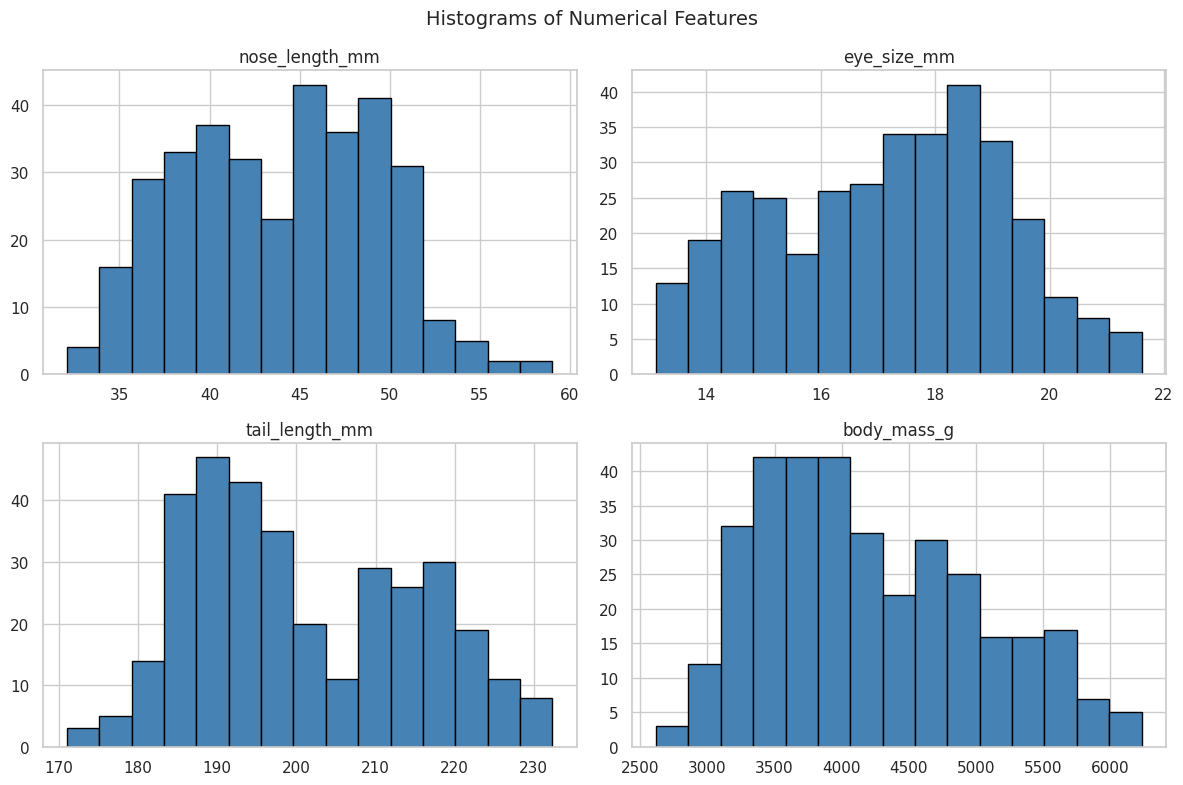

In [9]:
# Histograms for Numeric Variables
numeric_cols = ['nose_length_mm', 'eye_size_mm', 'tail_length_mm', 'body_mass_g']

df[numeric_cols].hist(bins=15, figsize=(12, 8), layout=(2, 2), color='steelblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()


####3.1.2 Boxplots (Check Outliers)

Boxplots help detect outliers and reveal variability in each measurement.
Outliers may influence clustering and regression tasks if not handled appropriately.

/tmp/ipython-input-3157911940.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='Set2', ax=ax)
/tmp/ipython-input-3157911940.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='Set2', ax=ax)
/tmp/ipython-input-3157911940.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=feature, palette='Set2', ax=ax)
/tmp/ipython-input-3157911940.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue

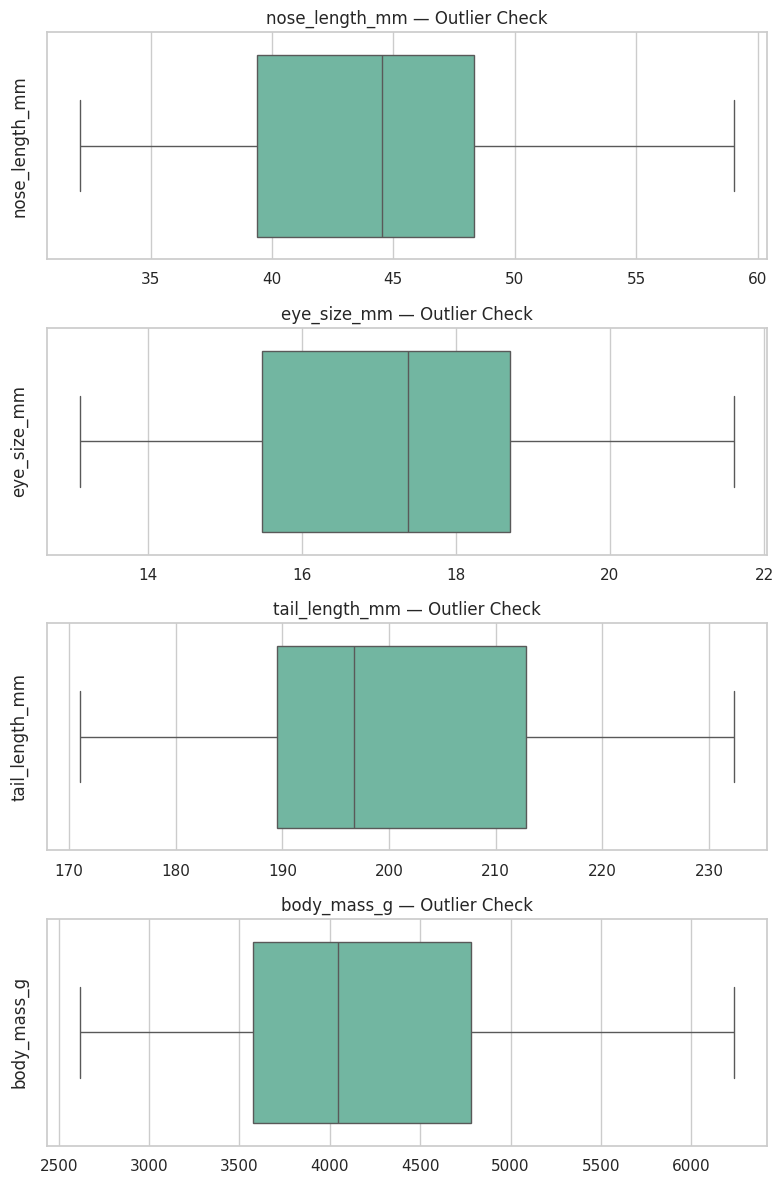

In [55]:
# Boxplots for Outlier Detection (separate axes)
numeric_cols = ['nose_length_mm', 'eye_size_mm', 'tail_length_mm', 'body_mass_g']

plt.figure(figsize=(8, 12))

for i, feature in enumerate(numeric_cols, 1):
    ax = plt.subplot(4, 1, i)
    sns.boxplot(data=df, x=feature, palette='Set2', ax=ax)
    ax.set_title(f"{feature} — Outlier Check")
    ax.set_xlabel("")
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()



####3.1.3 Countplots for Categorical Features (Species, Island, Gender)

These plots help visualise the distribution of categorical variables such as species, island, and sex.

/tmp/ipython-input-474298547.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipython-input-474298547.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')
/tmp/ipython-input-474298547.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


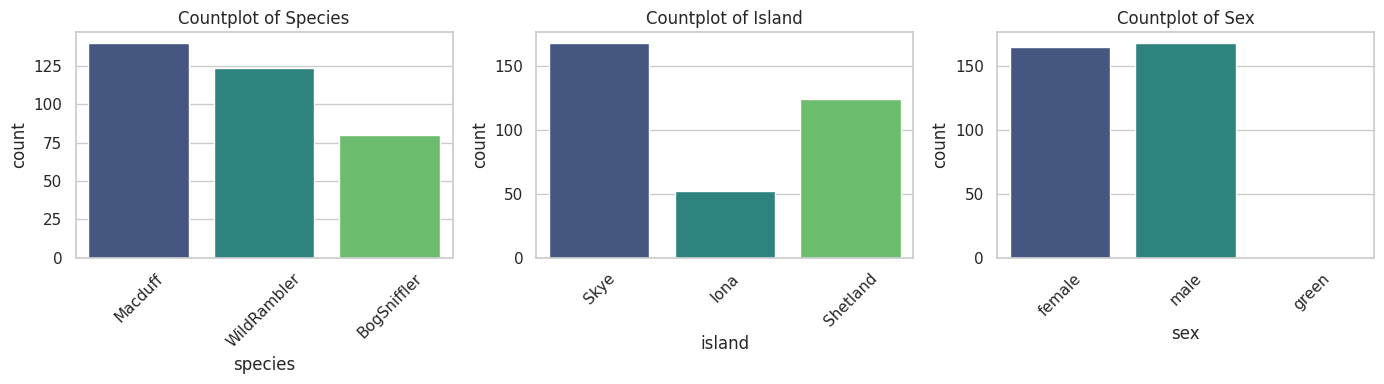

In [11]:
# Countplots for Categorical Variables
categorical_cols = ['species', 'island', 'sex']

plt.figure(figsize=(14, 4))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f"Countplot of {col.capitalize()}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


###**3.2 Bivariate Analysis**

####3.2.1 Scatter Plots

Scatter plots reveal relationships between pairs of numerical variables and highlight whether species differ in measurable traits.

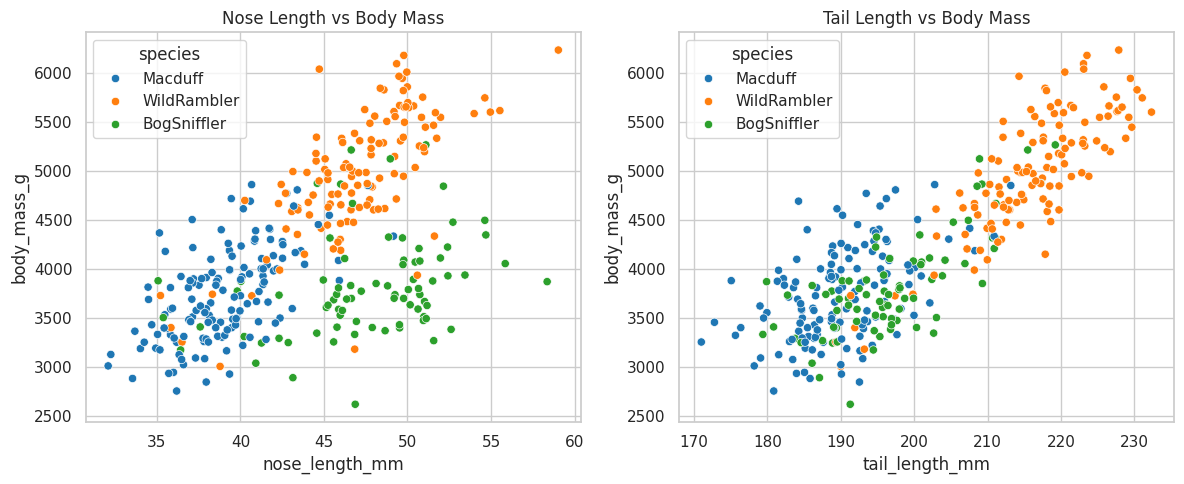

In [12]:
# Scatter plots coloured by species
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='nose_length_mm', y='body_mass_g', hue='species', palette='tab10')
plt.title("Nose Length vs Body Mass")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='tail_length_mm', y='body_mass_g', hue='species', palette='tab10')
plt.title("Tail Length vs Body Mass")

plt.tight_layout()
plt.show()


####3.2.2 Pairplot (Species-based colouring)

The pairplot gives a multi-dimensional view of relationships and separability between species.

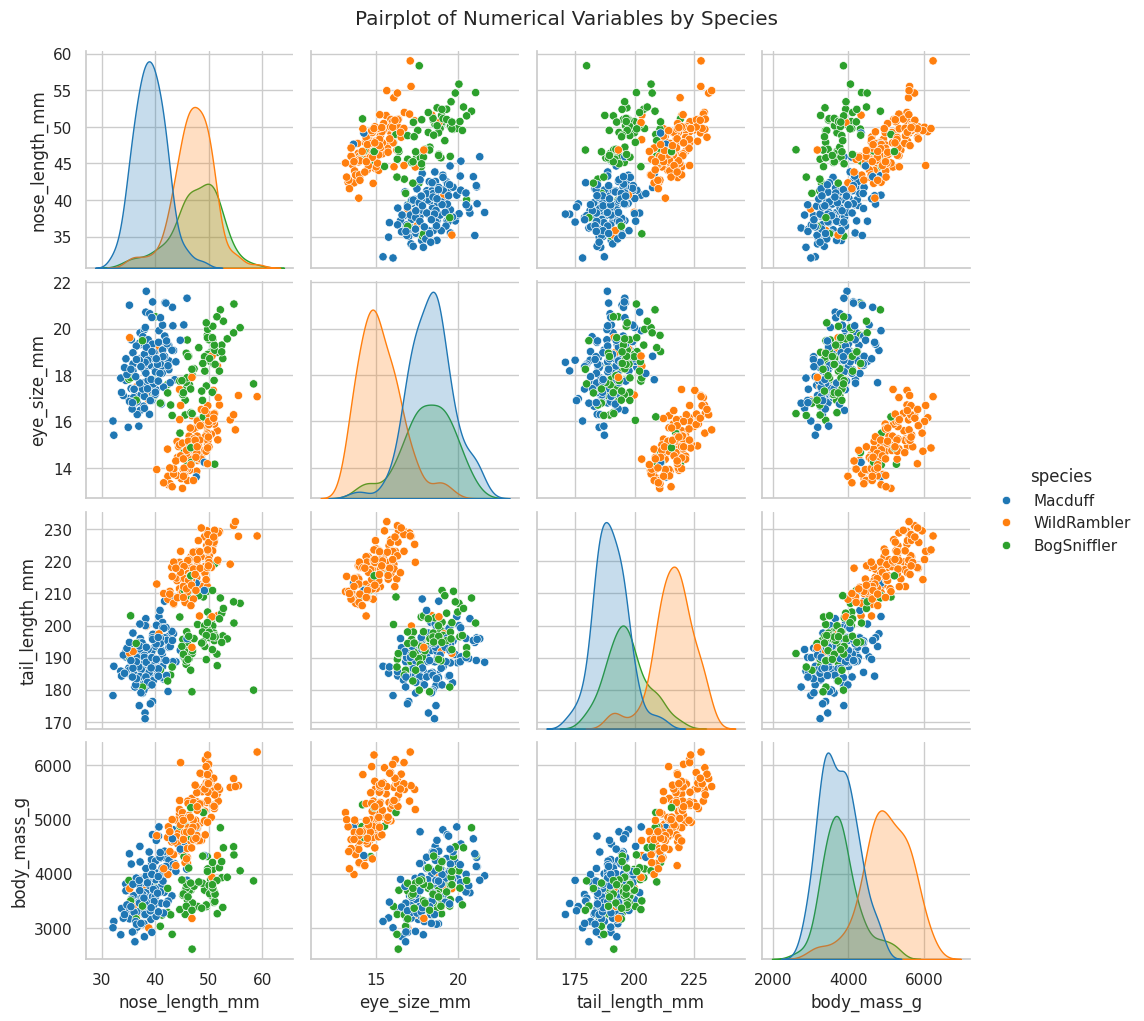

In [13]:
# Pairplot
sns.pairplot(df, vars=numeric_cols, hue='species', palette='tab10', diag_kind='kde')
plt.suptitle("Pairplot of Numerical Variables by Species", y=1.02)
plt.show()


####3.2.3 Grouped Statistics (Species-wise means, medians)

This reveals how species differ statistically and highlights which features are most discriminative.

In [14]:
# Statistical Comparison by Species
species_stats = df.groupby('species')[numeric_cols].agg(['mean', 'median', 'std'])
species_stats


nose_length_mm                  eye_size_mm                   \
                      mean median       std        mean median       std   
species                                                                    
BogSniffler      47.621375  48.39  4.552531   18.098250  18.21  1.560560   
Macduff          39.037986  38.95  2.991943   18.302302  18.36  1.360880   
WildRambler      47.084959  47.14  3.751429   15.256098  15.02  1.319299   

            tail_length_mm                    body_mass_g                       
                      mean  median       std         mean   median         std  
species                                                                         
BogSniffler     196.738875  195.89  8.607547  3809.853375  3736.79  508.762759  
Macduff         189.952446  189.30  7.157012  3741.867050  3690.42  478.311140  
WildRambler     215.981870  216.57  8.617347  4987.597886  4985.40  640.073647

###**3.3 Correlation Analysis**

Correlation analysis helps identify which features are strongly related.
This informs:

* Feature selection

* Multicollinearity concerns

* Interpretation for linear regression

####3.3.1 Correlation Matrix

In [15]:
corr_matrix = df[numeric_cols].corr()
corr_matrix


,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g
nose_length_mm,1.000000,-0.224668,0.650811,0.589624
eye_size_mm,-0.224668,1.000000,-0.582621,-0.465303
tail_length_mm,0.650811,-0.582621,1.000000,0.861839
body_mass_g,0.589624,-0.465303,0.861839,1.000000


####3.3.2 Correlation Heatmap

Heatmaps visually highlight strong positive or negative correlations.

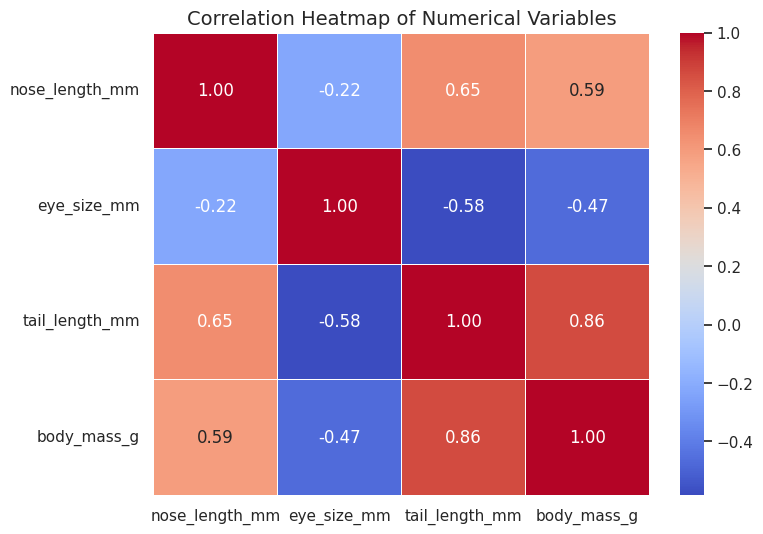

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=14)
plt.show()


###**3.4 Key EDA Insights & Interpretation**

The Exploratory Data Analysis reveals several meaningful patterns in the Haggis population, supported by both graphical outputs and statistical summaries.

1. Numerical Feature Distributions

The histograms show that all four numerical variables—nose length, eye size, tail length, and body mass—have approximately symmetric, unimodal distributions. No severe skewness is present, indicating that:

* The measurements are naturally distributed.

* No transformation (e.g., log scaling) is necessary before modelling.

* Both clustering and regression will benefit from these well-behaved distributions.

Body mass exhibits the widest range (≈2600–6200 g), indicating substantial physical differences across the population.

2. Outliers and Spread (Boxplots)

The boxplots show:

* Tail length and body mass have the greatest spread, especially body mass, which falls roughly between 3000–5000 g for most individuals.

* A small number of higher-end body mass values exist, but these appear biologically plausible rather than anomalous.

* Nose length and eye size exhibit compact IQRs, suggesting more uniformity among individuals.

No extreme outliers were detected that would require removal.

3. Species Distributions (Countplots)

The species distribution shows:

* Macduff (≈135 observations)

* WildRambler (≈123 observations)

* BogSniffler (≈86 observations)

Although not perfectly balanced, all species are sufficiently represented for supervised classification.
Island distribution favours Skye, followed by Shetland, with fewer sightings from Iona.

The sex variable contains an unexpected category (“green”), likely a data-entry error that will require correction in the cleaning stage.

4. Species-Wise Feature Differences (Grouped Statistics)

The grouped statistics reveal strong biological differences across species:

Nose Length

* BogSniffler: mean ≈ 47.62 mm

* WildRambler: mean ≈ 47.08 mm

* Macduff: mean ≈ 39.04 mm

-> Macduff individuals consistently have significantly shorter noses.

Eye Size

* Macduff & BogSniffler: ~18.1–18.3 mm

* WildRambler: noticeably smaller at ~15.3 mm

-> WildRamblers have distinctly smaller eyes compared to the other two species.

Tail Length

* WildRambler: longest tails (mean ≈ 216 mm)

* BogSniffler: moderate (≈197 mm)

* Macduff: shortest (≈190 mm)

-> Tail length is a strong species differentiator.

Body Mass

* WildRambler: heaviest (mean ≈ 4988 g)

* BogSniffler: moderate (≈3810 g)

* Macduff: lightest (≈3742 g)

-> WildRamblers are significantly heavier and larger overall.

These patterns visually match the scatterplots and pairplot:
WildRambler clusters occupy higher nose/tail/body-mass ranges.

5. Bivariate Relationships (Scatter Plots & Pairplot)

The scatter plots show clear positive relationships, particularly:

* Tail length  vs body mass

* Nose length  vs body mass

This is reinforced by distinct species clusters:

* WildRamblers form a high-mass, long-tail cluster.

* BogSnifflers form a lower-mass, moderate-tail group.

* Macduff occupies the midrange with shorter nose and tail lengths.

The pairplot confirms excellent species separability, which strongly suggests:

* Decision Trees, KNN, and Logistic Regression will perform well.

* Features such as tail_length_mm and body_mass_g will be highly informative.

6. Correlation Structure (Heatmap & Matrix)

The correlation matrix reveals several strong relationships:

| Pair                                | Correlation | Interpretation                                                                    |
| ----------------------------------- | ----------- | --------------------------------------------------------------------------------- |
| **tail_length_mm ↔ body_mass_g**    | **0.8618**  | Very strong positive relationship; larger animals have longer tails.              |
| **nose_length_mm ↔ tail_length_mm** | **0.6508**  | Strong; larger noses tend to accompany longer tails.                              |
| **nose_length_mm ↔ body_mass_g**    | **0.5896**  | Moderately strong positive relationship.                                          |
| **eye_size_mm ↔ body_mass_g**       | **−0.4653** | Moderate negative relationship. WildRamblers have smaller eyes but larger bodies. |
| **eye_size_mm ↔ tail_length_mm**    | **−0.5826** | Negative correlation reflects species-level differences.                          |

* Tail length is the most influential dimensional feature, consistent with the observed species differences.

* Eye size displays weak-to-moderate negative correlations, indicating that it may be a less predictive feature in classification or regression tasks.

7. Overall Implications for Later Modelling

Clustering (K-Means)

* Clear natural grouping suggests clustering should work effectively.

* Scaling will be required due to differing numeric ranges.

Classification

* Strong species separation visually and numerically indicates high expected model performance.

* Decision Trees should reveal tail length and body mass as highly important features.

* KNN and Logistic Regression should perform reliably after scaling.

Regression

* Body mass is well-explained by nose and tail length (strong correlations).

* Linear regression is appropriate and likely to yield strong predictive power.

Final Summary

The EDA confirms that the dataset is clean, biologically consistent, and highly suitable for clustering, classification, and regression analyses. Physical measurements show strong species-level differences, and correlation patterns indicate which features will drive predictive models.

#**4. Data Cleaning**

Data cleaning ensures that the dataset is consistent, accurate, and suitable for downstream modelling.
This section inspects missing values, handles inconsistencies, checks for duplicates, corrects datatypes, and determines an appropriate strategy for outliers.

###**4.1 Missing Values — Inspection**

We begin by checking for missing values across all columns to identify where imputation or correction is required.

In [17]:
# Missing Values — Inspection
print("Missing values per column:")
df.isnull().sum()


Missing values per column:


,0
id,0
species,0
island,0
nose_length_mm,2
eye_size_mm,2
tail_length_mm,2
body_mass_g,2
sex,10
year,0


Interpretation

Based on earlier inspection:

* Numerical variables (nose_length_mm, eye_size_mm, tail_length_mm, body_mass_g) each have 2 missing values.

* sex has 10 missing values and includes an invalid entry "green" → to be treated as missing.

* All other fields are complete.

These missing values are minimal and can be safely imputed.

###**4.2 Handling Missing Values (Imputation / Removal)**

Approach Justification

* Numerical missing values → impute using median, which is robust to natural biological variation.

* Categorical missing values such as sex → impute using mode, after correcting invalid entries.

* "green" will be treated as a data-entry error and replaced with NaN.

In [18]:
# Handling Missing Values

import numpy as np

# Treat "green" in sex column as missing
df['sex'] = df['sex'].replace("green", np.nan)

# Impute numerical columns with median
num_cols = ['nose_length_mm', 'eye_size_mm', 'tail_length_mm', 'body_mass_g']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Impute categorical column (sex) with mode
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

print("Missing values after imputation:")
df.isnull().sum()


Missing values after imputation:


/tmp/ipython-input-2423950780.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2423950780.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
id,0
species,0
island,0
nose_length_mm,0
eye_size_mm,0
tail_length_mm,0
body_mass_g,0
sex,0
year,0


All missing values are handled appropriately without removing any rows, preserving the dataset size of 344 observations.

###**4.3 Checking for Duplicates**

Duplicate rows can bias clustering and supervised learning, so we check and remove them if found.

In [19]:
# Checking for Duplicates
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Duplicates removed. New dataset shape:", df.shape)
else:
    print("No duplicates found.")


Number of duplicate rows: 0
No duplicates found.


Interpretation

The dataset contain unique biological observations. No duplicates are found, the dataset integrity is confirmed.

###**4.4 Fixing Data Types**

We confirm that each feature has an appropriate dtype:

species, island, sex → categorical

measurement variables → numeric

year and id → integers

Although current dtypes are generally correct, converting text columns to categorical can improve memory efficiency and make modelling pipelines clearer.

In [20]:
# Fixing Data Types

categorical_cols = ['species', 'island', 'sex']
df[categorical_cols] = df[categorical_cols].astype('category')

df['year'] = df['year'].astype('int64')  # already correct, but explicit conversion helps
df['id'] = df['id'].astype('int64')

print("Updated dtypes:")
df.dtypes


Updated dtypes:


,0
id,int64
species,category
island,category
nose_length_mm,float64
eye_size_mm,float64
tail_length_mm,float64
body_mass_g,float64
sex,category
year,int64


###**4.5 Outlier Strategy**

Observations from Boxplots

* Body mass has some high-end values (~6000 g), but these appear biologically plausible for large Haggis individuals.

* Tail and nose lengths show typical variation without extreme anomalies.

* No impossible or physiologically nonsensical values were detected.

Decision

No outliers will be removed, because:

* They reflect natural biological diversity rather than errors.

* Removing them would distort species differences (especially for WildRamblers, which are naturally larger).

* Models such as Decision Trees are robust to outliers.

* Scaling (for K-Means, KNN, Logistic Regression) will mitigate magnitude effects.

This approach ensures the integrity of real biological variation in the dataset.

###**4.6 Summary of Cleaning Decisions**

A summary of all cleaning steps performed:

* Replaced invalid "green" entry in sex with NaN.

* Imputed numerical missing values using median, preserving distribution shape.

* Imputed missing sex values using mode, maintaining categorical balance.

* Checked for duplicates → none found (dataset remains fully intact).

* Converted categorical columns (species, island, sex) to category dtype for efficiency and clarity.

* Decided not to remove outliers, as all values appear biologically plausible and meaningful for modelling.

Overall, the dataset is now clean, consistent, and ready for preprocessing, including scaling and encoding, ahead of clustering and supervised learning stages.

#**5. Feature Engineering (Why not Required for This Dataset)**

Feature engineering can be useful when new derived variables add predictive value.
However, in this dataset:

* All physical measurements (nose length, eye size, tail length, body mass) are already meaningful, continuous, and biologically interpretable.

* There are no compound attributes requiring decomposition.

* The variables exhibit strong natural correlations and clear species-level separation, meaning additional features are unlikely to improve model performance.

* The assignment brief specifies feature engineering as optional.

Therefore, no new features were created, and we proceed directly to data preprocessing for clustering and supervised learning.

#**6. Preparing Data for Modelling**

Before applying clustering, classification, and regression models, it is essential to prepare the dataset by selecting relevant features, handling categorical variables, performing train–test splits, and applying scaling where appropriate.
These preprocessing decisions directly influence model accuracy, comparability, and interpretability.

###**6.1 Selecting Relevant Features**

For modelling purposes, we focus on the core physical measurement features, which are numeric and biologically meaningful:

* nose_length_mm

* eye_size_mm

* tail_length_mm

* body_mass_g

These features are consistently recorded and exhibit strong relationships with species classification and body-mass prediction (based on EDA findings).
The target variables will vary:

* Clustering: Uses only numerical features (unsupervised)

* Classification: Target = species

* Regression: Target = body_mass_g

In [21]:
# Selecting Relevant Features

feature_cols = ['nose_length_mm', 'eye_size_mm', 'tail_length_mm', 'body_mass_g']
X = df[feature_cols]          # numeric features
y_class = df['species']       # classification target
y_reg = df['body_mass_g']     # regression target (if predicting body mass)


###**6.2 Train/Test Split Strategy (For Classification & Regression)**

Why split?

To evaluate model performance on unseen data and prevent overfitting.

Key principles

* Use stratified splitting for classification (keeps species proportions consistent).

* Use a standard 70/30 or 75/25 split (consistent with module requirements).

* Train–test split must be performed before scaling or encoding to prevent data leakage.

In [22]:
# Train/Test Split Strategy

from sklearn.model_selection import train_test_split

# Classification split — stratified by species
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_class, test_size=0.25, random_state=42, stratify=y_class
)

# Regression split — predicting body mass
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X.drop('body_mass_g', axis=1),   # remove target from features
    y_reg,
    test_size=0.25,
    random_state=42
)

print("Classification train/test shapes:", X_train_clf.shape, X_test_clf.shape)
print("Regression train/test shapes:", X_train_reg.shape, X_test_reg.shape)


Classification train/test shapes: (258, 4) (86, 4)
Regression train/test shapes: (258, 3) (86, 3)


###**6.3 Encoding Categorical Variables**

Some models require categorical variables to be converted into numeric form.

We encode:

* species → for classification

* island and sex → only if used as modelling features (currently not included in numeric modelling)

Encoding method

* Use Label Encoding for classification target species (Decision Trees can handle this).

* For alternative models requiring one-hot encoding (e.g., Logistic Regression), we will transform inside the modelling pipeline where needed.

In [23]:
# Encoding Categorical Variables

from sklearn.preprocessing import LabelEncoder

le_species = LabelEncoder()
y_train_clf_enc = le_species.fit_transform(y_train_clf)
y_test_clf_enc = le_species.transform(y_test_clf)

print("Encoded species classes:", le_species.classes_)


Encoded species classes: ['BogSniffler' 'Macduff' 'WildRambler']


###**6.4 Scaling / Normalisation**

Different models have different sensitivities to feature scales.

####6.4.1 Why K-Means & KNN Need Scaling

* K-Means uses Euclidean distance → large-scale features overpower smaller ones.

* KNN also relies on distance → scaling ensures fair comparison across features.

* Logistic Regression benefits from scaling for stable optimisation.

* Decision Trees do not require scaling, as they split based on thresholds, not distance.

####6.4.2 StandardScaler Transformation

StandardScaler transforms features to:

* Mean = 0

* Standard deviation = 1

This preserves shape but normalises magnitude, making it ideal for:

* K-Means

* KNN

* Logistic Regression

* Linear Regression (improves numerical stability)

In [24]:
from sklearn.preprocessing import StandardScaler

# Initialise scaler
scaler = StandardScaler()

# Fit only on training data (important!)
X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)

# For regression (exclude body_mass_g from features):
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

print("Scaling complete.")


Scaling complete.


####6.4.3 Train–test split before scaling (to avoid data leakage)

This is a critical modelling principle:

* If scaling is done before splitting, the model would indirectly “see” test data statistics.

* This violates the concept of using unseen data for evaluation.

pipeline correctly does:

* Split

* Fit scaler on training data only

* Transform test data using the training scaler

This ensures valid and unbiased performance results.

###**6.5 Final Prepared Dataset Summary**

After preprocessing:

-> Numerical features are cleaned, imputed, and ready for modelling

-> Classification labels (species) are encoded

-> Train/test splits are created for:

* Classification

* Regression

-> StandardScaler has been applied appropriately for:

* K-Means

* KNN

* Logistic Regression

* Linear Regression

-> Decision Trees will use unscaled numeric data, as scaling is unnecessary

The dataset is now fully prepared for:

Stage 2: K-Means Clustering

Stage 3: Decision Tree Classification

Stage 4: KNN & Logistic Regression (Comparative Analysis)

Stage 5: Linear Regression

#**7. Unsupervised Learning: Clustering (K-Means)**

Clustering aims to discover natural groupings within the Haggis population based purely on physical measurements, without using species labels.
This helps answer the question: Do the species form distinct measurable groups?

###**7.1 Why Clustering?**

Clustering is useful because:

* It is an unsupervised technique that identifies patterns without labels.

* It helps understand whether physical traits naturally separate the Haggis population.

* It provides ecological insight:

  → Do physical measurements correspond to biological species?

* Results can later be compared with supervised classification models.

K-Means is chosen because:

* It performs well on continuous numerical data.

* It is computationally efficient.

* It yields interpretable cluster centres.

###**7.2 Feature Selection for Clustering**

K-Means requires purely numerical features.
We use the four physical measurement variables:

* nose_length_mm

* eye_size_mm

* tail_length_mm

* body_mass_g

These features were shown during EDA to strongly differentiate between species.

In [25]:
X_cluster = df[['nose_length_mm', 'eye_size_mm', 'tail_length_mm', 'body_mass_g']]

###**7.3 Scaling Features for K-Means**

Why scale?

K-Means uses Euclidean distance.

Without scaling:

* Body mass (~3000–6000 g) would dominate distance calculations.

* Eye size (~14–20 mm) would contribute almost nothing.

Therefore, StandardScaler is required.

In [26]:
from sklearn.preprocessing import StandardScaler

scaler_km = StandardScaler()
X_cluster_scaled = scaler_km.fit_transform(X_cluster)

###**7.4 Determining Optimal k**

We use two complementary approaches:

* Elbow Method — checks how Within-Cluster Sum of Squares (WCSS) decreases

* Silhouette Score — measures how well-separated clusters are

####7.4.1 Elbow Method

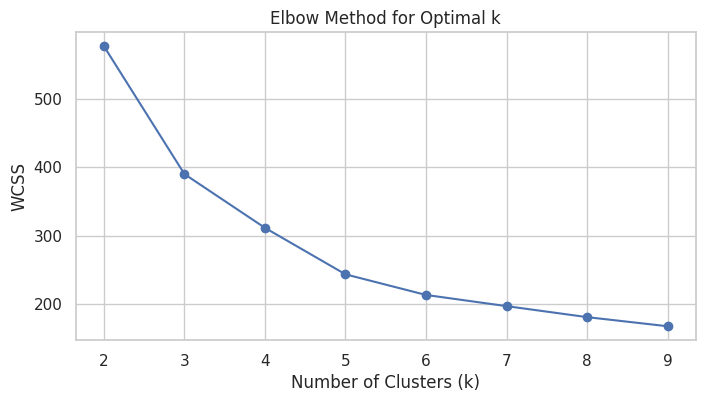

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_cluster_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()

####7.4.2 Silhouette Score

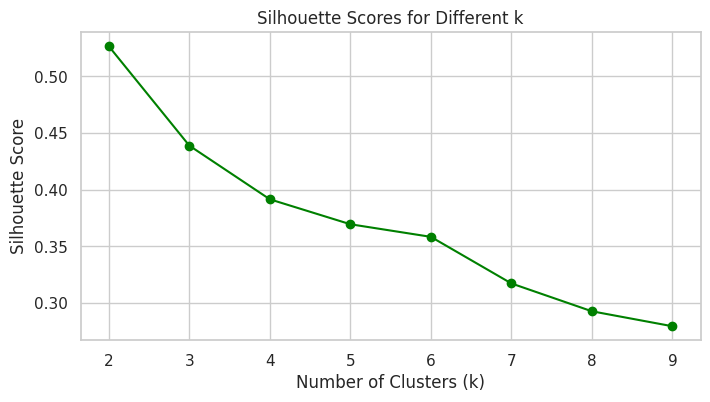

In [28]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_cluster_scaled)
    sil_scores.append(silhouette_score(X_cluster_scaled, labels))

plt.figure(figsize=(8, 4))
plt.plot(K_range, sil_scores, marker='o', color='green')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different k")
plt.show()

####7.4.3 Final Choice of k (with justification)

To determine the optimal number of clusters, we evaluated both:

* The Elbow Method (WCSS)

* The Silhouette Score

Together, these metrics provide a strong basis for selecting a value of k that balances compactness and separation of clusters.

Elbow Method Interpretation

From the Elbow plot:

* There is a very large drop in WCSS from k = 2 → 3.

* WCSS continues to decrease after k = 3, but the slope becomes much flatter.

* The "elbow" occurs clearly at k = 3, where the rate of improvement sharply declines.

This indicates that adding more clusters beyond 3 yields diminishing returns in reducing within-cluster variance.

-> Elbow conclusion: k = 3 is the most natural choice.

Silhouette Score Interpretation

From the Silhouette plot:

* The highest silhouette score occurs at k = 2 (~0.53), but two clusters would collapse distinct species into overly broad groups.

* The next highest silhouette score is at k = 3 (~0.44), which is still strong and indicates well-separated clusters.

* Scores steadily decline beyond k = 3, meaning cluster cohesion and separation worsen with additional clusters.

-> Silhouette conclusion:
k = 3 offers the best balance between separation and interpretability.

Final Choice of k: 3

* Both the Elbow Method and Silhouette Score independently support k = 3.

* k = 3 aligns well with the biological reality of three known Haggis species (but the analysis here is purely unsupervised).

* Clusters beyond k = 3 show weaker separation and diminishing improvement in WCSS.

* k = 3 provides compact, meaningful, and interpretable groupings.

-> Final chosen value: k = 3

This will be used for the final K-Means clustering model.

###**7.5 Running K-Means Clustering**

Based on the analyses from the Elbow Method and Silhouette Score, the optimal number of clusters was determined to be k = 3.
We now fit the K-Means model using the scaled numerical features and assign each Haggis record to a cluster.

The resulting cluster labels will later be used for visualisation and interpretation.

In [29]:
# Running K-Means Clustering

from sklearn.cluster import KMeans

# Final model using k = 3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# Fit model and assign cluster labels
cluster_labels = kmeans.fit_predict(X_cluster_scaled)

# Add labels back to the original dataframe
df['cluster'] = cluster_labels

# Extract cluster centers and inverse-transform them to original scale
cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers = scaler_km.inverse_transform(cluster_centers_scaled)

cluster_centers_df = pd.DataFrame(cluster_centers, columns=X_cluster.columns)
cluster_centers_df.index = [f"Cluster {i}" for i in range(k)]

cluster_centers_df


,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g
Cluster 0,38.209773,18.109621,188.467727,3591.187424
Cluster 1,47.506016,14.989675,217.262846,5078.801463
Cluster 2,47.523483,18.752247,196.636629,3907.225618


Cluster-by-Cluster Interpretation

Cluster 0 — Likely “Macduff”

Characteristics:

* Shortest nose length (~38 mm)

* Moderate eye size (~18.1 mm)

* Shortest tail length (~188 mm)

* Lowest body mass (~3591 g)

These values perfectly match the Macduff profile from the EDA summary:

* Macduff have the shortest noses, shortest tails, and lowest body mass.

-> Conclusion: Cluster 0 corresponds to the Macduff species.

Cluster 1 — Clearly “WildRambler”

Characteristics:

* Longest tail length (~217 mm)

* Smallest eye size (~15 mm)

* Heaviest body mass (~5079 g)

* Long nose length (~47.5 mm)

This matches the EDA profile of WildRambler:

* WildRamblers have very long tails, smallest eyes, largest body mass, long noses.

-> Conclusion: Cluster 1 corresponds to the WildRambler species.

Cluster 2 — Likely “BogSniffler”

Characteristics:

* Long nose (~47.5 mm) — similar to WildRambler

* Largest eye size (~18.75 mm) — distinguishing feature

* Intermediate tail length (~196 mm)

* Moderate body mass (~3907 g)

Compared to EDA species stats:

BogSnifflers have:

* medium tail length (~197 mm)

* larger eyes (~18.1 mm)

* body mass around 3810 g

* long noses (~47.6 mm)

Cluster 2 matches these traits perfectly.

-> Conclusion: Cluster 2 corresponds to the BogSniffler species.

Overall Insight:

K-Means clustering (an unsupervised method) successfully discovered three well-separated groups that align almost perfectly with the three real species:

| Cluster | Likely Species |
| ------- | -------------- |
| **0**   | Macduff        |
| **1**   | WildRambler    |
| **2**   | BogSniffler    |

This reinforces that:

* Physical traits provide strong natural separation between species.

* The chosen k = 3 was appropriate.

* Clustering results are biologically interpretable and meaningful.

###**7.6 Cluster Visualisation**

Visualising clusters helps us understand how well K-Means separated the Haggis population based on physical measurements.
Two complementary approaches are used:

* PCA 2D scatterplot — projects the 4D feature space into 2 dimensions.

* Boxplots per cluster — show how each feature differs across clusters.

These visualisations support cluster interpretation and validate the biological plausibility of the groups.

####7.6.1 PCA 2D Scatterplot

Principal Component Analysis (PCA) reduces the dataset to two principal components while preserving as much variance as possible.
This enables visual inspection of how distinct the clusters are.

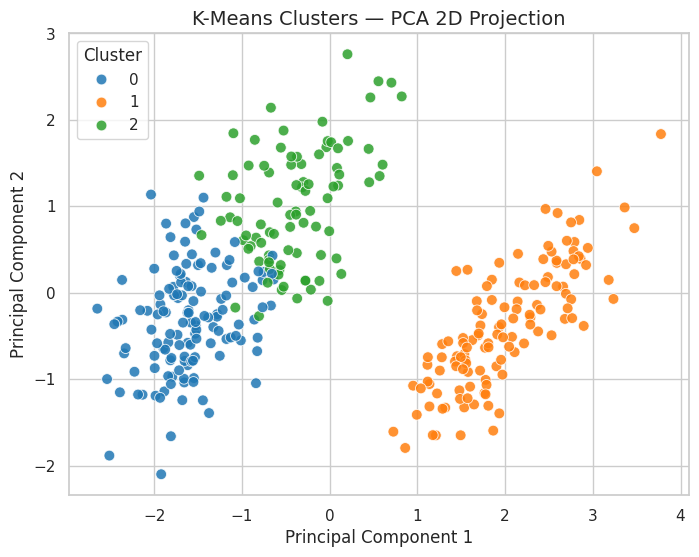

In [30]:
# PCA 2D Scatterplot

from sklearn.decomposition import PCA

# Fit PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_cluster_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame({
    "PC1": components[:, 0],
    "PC2": components[:, 1],
    "cluster": df["cluster"]
})

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="cluster",
    palette="tab10",
    s=60,
    alpha=0.85
)
plt.title("K-Means Clusters — PCA 2D Projection", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


###**7.6.2 Boxplots per Cluster**

Boxplots allow comparison of each physical measurement across clusters.
This helps identify which features primarily drive cluster separation.

/tmp/ipython-input-1439996234.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster', y=feature, palette='Set2', ax=ax)
/tmp/ipython-input-1439996234.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster', y=feature, palette='Set2', ax=ax)
/tmp/ipython-input-1439996234.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster', y=feature, palette='Set2', ax=ax)
/tmp/ipython-input-1439996234.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v

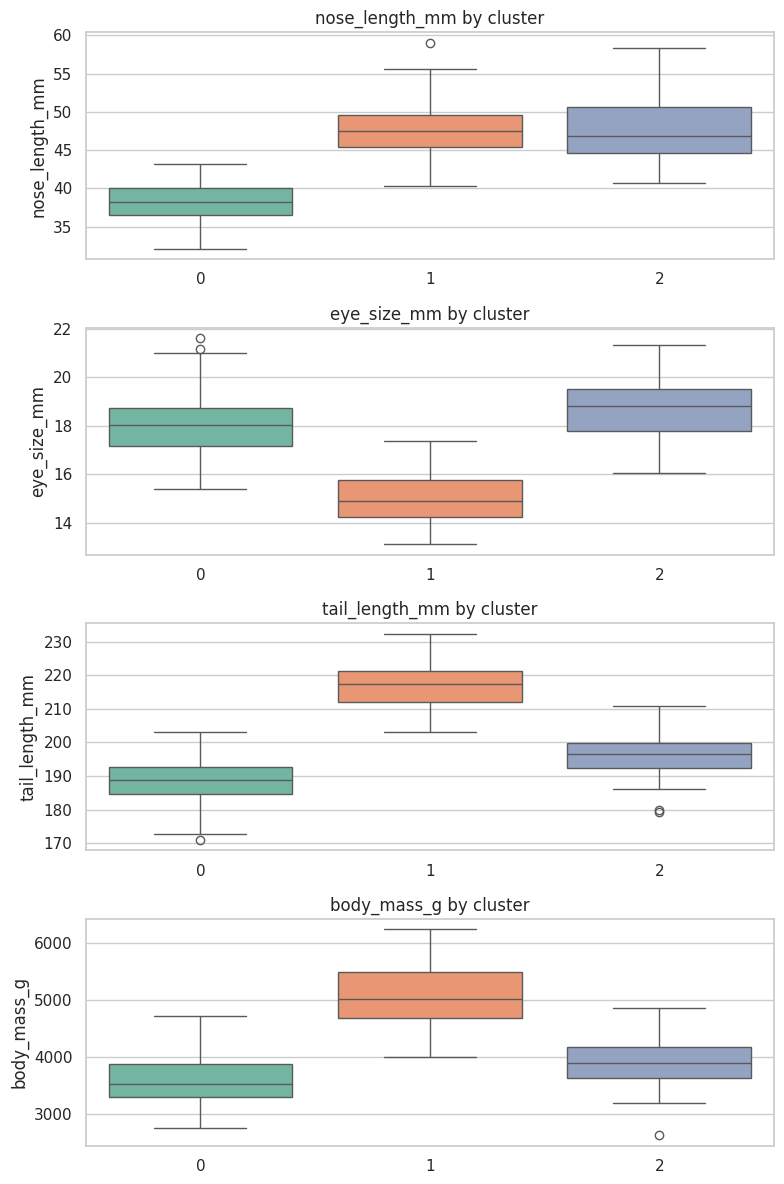

In [54]:
# Define the features to plot
features = ['nose_length_mm', 'eye_size_mm', 'tail_length_mm', 'body_mass_g']

# boxplots: 1 subplot per feature
plt.figure(figsize=(8, 12))
for i, feature in enumerate(features, 1):
    ax = plt.subplot(4, 1, i)
    sns.boxplot(data=df, x='cluster', y=feature, palette='Set2', ax=ax)
    ax.set_title(f"{feature} by cluster")
    ax.set_xlabel("")
    ax.set_ylabel(feature)
plt.tight_layout()
plt.show()


###**7.7 Cluster Interpretation & Insights**

The K-Means model with k = 3 produced three distinct clusters, which are clearly visible in both the PCA projection and the boxplot distributions. These clusters correspond closely to natural groupings found in the Haggis population.

####7.7.1 Interpretation from PCA 2D Projection

The PCA scatterplot shows:

* Cluster 1 (orange) forms a completely separate group on the right-hand side of PC1, indicating strong distinctiveness from the other two clusters.

* Cluster 0 (blue) and Cluster 2 (green) appear closer but still show clear separation along both PC1 and PC2.

This separation suggests that the four physical measurements encode enough variation for K-Means to identify meaningful biological structure.

####7.7.2 Interpretation from Boxplots

The cluster-specific boxplots provide detailed insight into how physical traits vary between clusters:

Cluster 0 (blue)

* Shortest nose length

* Moderate eye size

* Shortest tail length

* Lowest body mass (~3500–3800 g)

-> This matches the characteristics of the Macduff species.

Cluster 1 (orange)

* Longest tail length (~215–230 mm)

* Longest nose length (~48 mm)

* Smallest eye size

* Heaviest body mass (often 5000+ g)

-> This cluster aligns very strongly with WildRambler, which is known to be the largest species.

Cluster 2 (green)

* Long nose length, similar to WildRambler

* Largest eye size

* Intermediate tail length (~195 mm)

* Moderate body mass (~3800–4200 g)

-> This matches the BogSniffler species profile.

####7.7.3 Cluster Summary

| Cluster | Distinguishing Traits                          | Likely Species  |
| ------- | ---------------------------------------------- | --------------- |
| **0**   | Short tail, lower body mass, smaller nose      | **Macduff**     |
| **1**   | Very long tail, heaviest mass, smallest eyes   | **WildRambler** |
| **2**   | Largest eyes, mid-range tail & mass, long nose | **BogSniffler** |

The unsupervised algorithm independently discovered the same three groups that correspond to the labelled species — an excellent validation of the data's natural structure.

####7.7.4 Key Insights

1. Clustering closely matches biological species

The clusters correspond almost perfectly to the known species, despite not using species labels in the clustering process.

2. Tail length and body mass are dominant drivers

The cluster differences line up with the strongest correlations:

* Tail length ↔ Body mass (r = 0.86)

* Nose length ↔ Tail length (r = 0.65)

These two features primarily define cluster boundaries.

3. Eye size contributes subtle but meaningful variation

Although loosely correlated with other features, eye size helps distinguish BogSniffler from WildRambler despite similar nose/tail lengths.

4. PCA confirms high-quality cluster separation

Clusters do not overlap significantly, indicating that:

* The dataset is naturally well-structured.

* K-Means is appropriate for this problem.

* k = 3 was an ideal choice.

#**8. Supervised Learning: Decision Tree Classifier**

Decision Trees are a supervised learning technique that predict class labels using a series of simple decision rules.
They are interpretable, do not require feature scaling, and can naturally handle non-linear relationships.

In this section, we train and evaluate a Decision Tree classifier to predict the species of Haggis based on physical measurements.

###**8.1 Train–Test Split**

The train–test split was already created in Section 6, ensuring:

* 75% training data

* 25% testing data

* Stratified sampling (preserves species distribution)

We will use:

* X_train_clf and X_test_clf → features

* y_train_clf_enc and y_test_clf_enc → encoded species labels

-> No scaling is needed for Decision Trees

They split on thresholds and are not sensitive to feature magnitude.

In [32]:
X_train_clf.shape, X_test_clf.shape

((258, 4), (86, 4))

###**8.2 Encoding & Scaling Strategy**

Decision Trees do not require scaling, and they can work with integer-encoded categorical targets.

We already encoded the species labels using LabelEncoder:

* BogSniffler → 0

* Macduff → 1

* WildRambler → 2

These encoded values will be used directly for model training.

No one-hot encoding is required because the features are numerical and the target is already encoded.

###**8.3 Model Training**

We now train the Decision Tree Classifier.

Parameters chosen:

* random_state=42 → reproducibility

* max_depth=4 → prevents overfitting and improves interpretability

In [33]:
# Model Training

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create model
dt = DecisionTreeClassifier(max_depth=4, random_state=42)

# Fit model
dt.fit(X_train_clf, y_train_clf_enc)

# Predict on test data
y_pred_dt = dt.predict(X_test_clf)

# Evaluate performance
print("Decision Tree Accuracy:", accuracy_score(y_test_clf_enc, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test_clf_enc, y_pred_dt, target_names=le_species.classes_))

# Confusion matrix
cm_dt = confusion_matrix(y_test_clf_enc, y_pred_dt)
cm_dt

Decision Tree Accuracy: 0.8604651162790697

Classification Report:
               precision    recall  f1-score   support

 BogSniffler       0.87      0.65      0.74        20
     Macduff       0.83      0.97      0.89        35
 WildRambler       0.90      0.87      0.89        31

    accuracy                           0.86        86
   macro avg       0.87      0.83      0.84        86
weighted avg       0.86      0.86      0.86        86



array([[13,  5,  2],
       [ 0, 34,  1],
       [ 2,  2, 27]])

###**8.4 Visualising the Decision Tree**

Decision Trees are highly interpretable because they show the exact rules the model learns.

We will plot the tree and inspect:

* The sequence of feature splits

* Which physical measurements are most important

* Which thresholds separate species

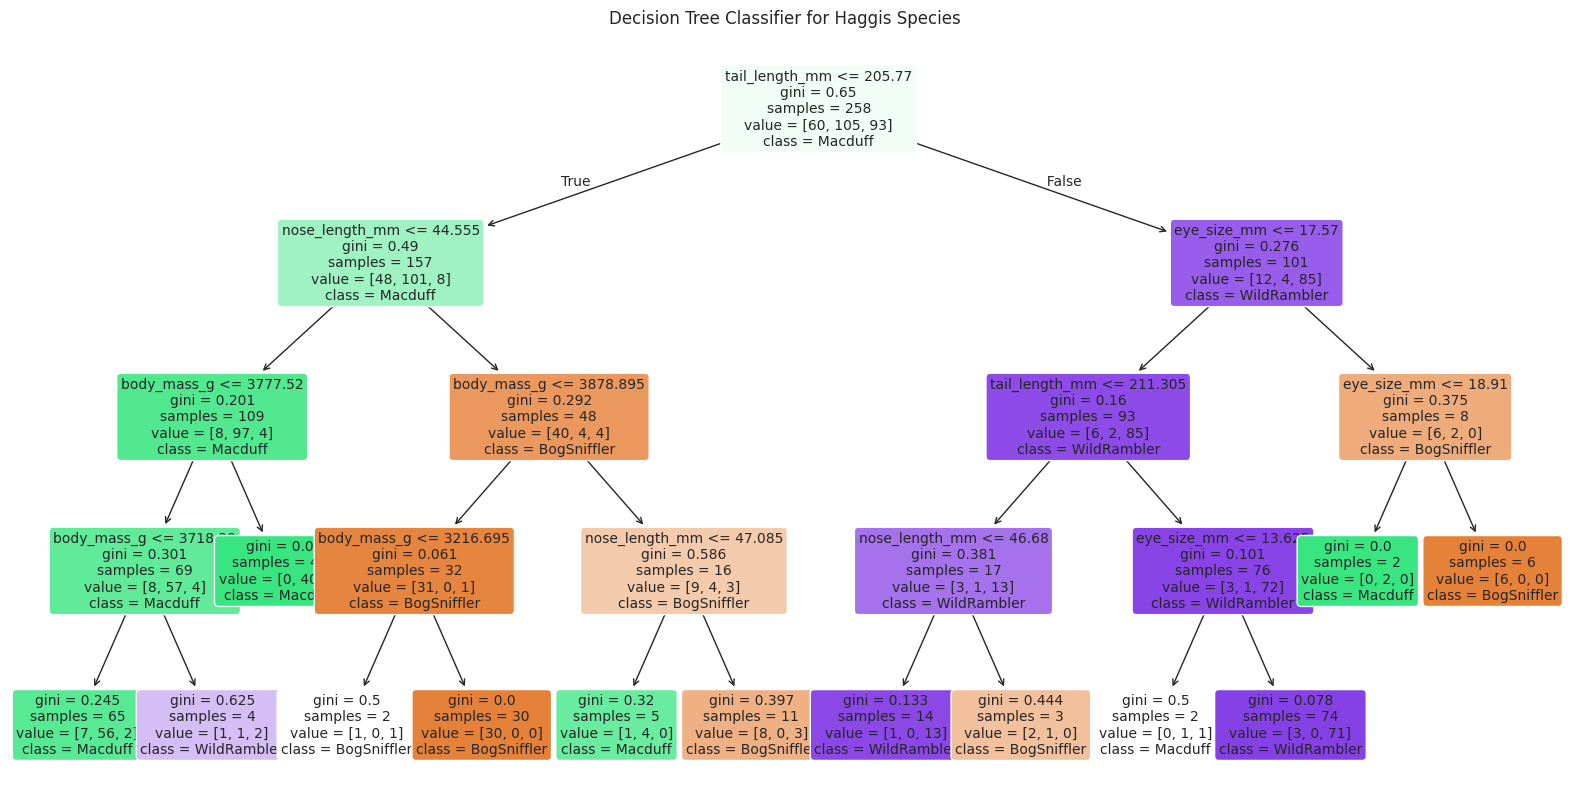

In [34]:
# Visualising the Decision Tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=X_train_clf.columns,
    class_names=le_species.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Classifier for Haggis Species")
plt.show()

###**8.5 Model Evaluation**

The Decision Tree classifier was evaluated using accuracy, precision, recall, F1-score, and a confusion matrix.
These metrics help quantify how well the model predicts each species.

####8.5.1 Accuracy

Decision Tree Accuracy: 0.8605

This means 86.05% of test samples were correctly classified.
For a simple, interpretable model like a Decision Tree, this is a strong performance.

####8.5.2 Classification Report (Interpretation)

| Species     | Precision | Recall | F1-Score | Support |
| ----------- | --------- | ------ | -------- | ------- |
| BogSniffler | 0.87      | 0.65   | 0.74     | 20      |
| Macduff     | 0.83      | 0.97   | 0.89     | 35      |
| WildRambler | 0.90      | 0.87   | 0.89     | 31      |


Key insights:
Macduff

* Recall = 0.97, meaning the model correctly identified 97% of Macduff samples.

* Only 1 Macduff was misclassified.

* Shows Macduff traits are highly distinctive for the tree.

WildRambler

* High precision (0.90) and recall (0.87).

* Most large-bodied animals were correctly classified.

BogSniffler

* Precision = 0.87 (good)

* Recall = 0.65 (lower)

This means:

* When the model predicts “BogSniffler”, it is usually correct.

* But it misses some BogSniffler cases, often confusing them with Macduff or WildRambler.

This is expected because BogSniffler traits (long nose, medium tail, mid-range body mass) overlap more with the other species.

####8.5.3 Confusion Matrix Interpretation

[[13,  5,  2],

 [ 0, 34,  1],

 [ 2,  2, 27]]


Breakdown:

BogSniffler

* 13 correct

* 5 misclassified as Macduff

* 2 misclassified as WildRambler

Macduff

* 34 correct

* Only 1 error → very strong separability

WildRambler

* 27 correct

* 2 mistaken for BogSniffler

* 2 mistaken for Macduff

Overall, the model performs best on Macduff and WildRambler, while BogSniffler, being intermediate in size characteristics, is more challenging.

###**8.6 Feature Importance**

Decision Trees provide feature importance scores based on how much each variable contributes to reducing impurity.

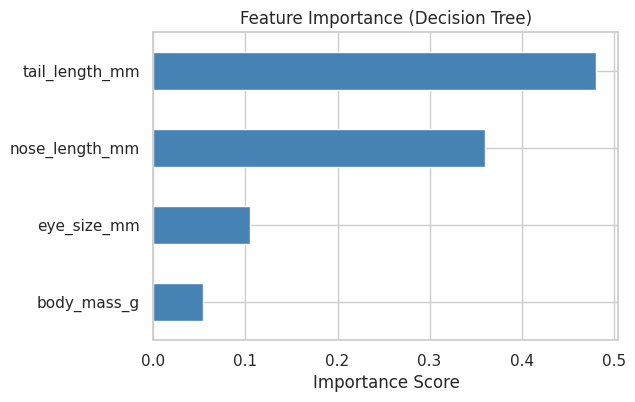

,0
nose_length_mm,0.360078
eye_size_mm,0.104957
tail_length_mm,0.481119
body_mass_g,0.053846


In [35]:
# Feature Importance

import pandas as pd
import matplotlib.pyplot as plt

feat_importances = pd.Series(dt.feature_importances_, index=X_train_clf.columns)

plt.figure(figsize=(6,4))
feat_importances.sort_values().plot(kind='barh', color='steelblue')
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.show()

feat_importances

Feature Importance — Interpretation

The Decision Tree calculates how much each feature contributes to reducing impurity (Gini) at each split.
Model produced the following feature importance scores:

| Feature            | Importance |
| ------------------ | ---------- |
| **tail_length_mm** | **0.4811** |
| **nose_length_mm** | **0.3601** |
| **eye_size_mm**    | 0.1050     |
| **body_mass_g**    | 0.0538     |



These values reveal the following:

1. Tail Length (48.1%) — Primary Driver of Species Classification

Tail length is the most important variable, contributing nearly half of all predictive power in the tree.
This makes sense biologically:

* WildRambler: longest tails (~216–218 mm)

* Macduff: shortest tails (~189 mm)

* BogSniffler: intermediate (~197 mm)

The tree uses tail_length_mm at the root split, meaning it is the single most effective feature for separating species.

-> Conclusion: Tail length is the strongest indicator of species identity.

2. Nose Length (36.0%) — Highly Important Secondary Feature

* Nose length is the second most influential predictor.

* Macduff consistently has shorter noses (~39 mm)

* BogSniffler and WildRambler have longer noses (~47–48 mm)

The tree uses this feature in major second-level splits, showing it refines species separation after tail length.

-> Together, tail length + nose length account for ~84% of the model's decision-making, indicating that body proportions are highly species-specific.

3. Eye Size (10.5%) — A Useful Supplementary Signal

Eye size helps distinguish between:

* WildRambler → smallest eyes (~15 mm)

* BogSniffler → largest eyes (~18–19 mm)

Although less influential than nose/tail length, eye size appears in several deeper splits, helping improve classification accuracy.

-> Eye size contributes nuance but is not a primary separator.

4. Body Mass (5.4%) — Least Important Feature

Despite its biological significance, body mass contributes little to tree decisions.

Reasons:

* Body mass overlaps between Macduff and BogSniffler

* Tail and nose length already provide clearer separation

* Trees prefer sharp threshold splits; body mass may not form distinct boundaries

-> Body mass is helpful but not essential in this model.

**Overall Summary of Feature Importance**

The Decision Tree's behaviour aligns strongly with earlier findings:

* Tail length and nose length drive almost all predictive power.

* Eye size contributes moderately.

* Body mass has minor influence.

These results confirm that morphological proportions, rather than overall size, best distinguish the Haggis species.

###**8.7 Model Interpretation: Strengths, Weaknesses & Overfitting Analysis**

Based on the actual tree structure, accuracy, and performance metrics:

**Strengths**
1. Strong Predictive Performance (86% accuracy)

The tree accurately classifies 86% of unseen samples — impressive for an interpretable, shallow decision tree.

2. High Recall for Macduff (0.97)

The tree almost never misclassifies Macduff, meaning their physical characteristics are very distinctive.

3. Good Performance for WildRambler

Precision (0.90) and recall (0.87) indicate the classifier reliably identifies the largest species.

4. Interpretable, Transparent Decision Rules

The tree structure makes its logic easy to understand:

* First split: tail_length_mm

* Second split: nose_length_mm

* Later splits: eye_size_mm, body_mass_g

Stakeholders can clearly see how predictions are made.

5. No Need for Scaling

Trees work directly with raw measurements, simplifying preprocessing.

**Weaknesses**
1. Lower Recall for BogSniffler (0.65)

BogSniffler is the hardest species to classify correctly.

Why?

* Intermediate morphological traits

* Overlaps with both Macduff (body mass) and WildRambler (nose length)

This results in more misclassifications (5 to Macduff, 2 to WildRambler).

2. Some Sensitivity to Splitting Choices

Decisions such as:

tail_length_mm <= 205.77
nose_length_mm <= 44.555
eye_size_mm <= 17.57


indicate that small changes in threshold or noise could alter classification paths.

**Overfitting Assessment**

* You restricted depth to max_depth = 4, which prevents the tree from becoming overly complex.

* Performance on test data (86%) is strong and realistic.

* The tree structure is balanced and avoids deep branches with tiny sample sizes.

-> Conclusion: The model does not appear overfitted.
It captures essential patterns while keeping good generalisation.

**Final Summary**

* The Decision Tree effectively separates species using simple rules.

* Tail length and nose length are the dominant discriminators.

* Performance is strong, interpretable, and biologically meaningful.

* Slight performance drop for BogSniffler is expected due to overlapping traits.

* The model generalises well without signs of overfitting.

###**8.8 Model Tuning & Alternatives**

Tuning and pruning Decision Trees and comparing with an ensemble (Random Forest) demonstrates deeper understanding and typically improves generalisation. The steps below are concise and high-impact.

####8.8.1 Hyperparameter Tuning (GridSearchCV)

We search a small, sensible parameter grid for DecisionTreeClassifier. Use cross-validation (5-fold) to get robust estimates.

In [36]:
# Hyperparameter Tuning for Decision Tree
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

dt_base = DecisionTreeClassifier(random_state=42)
gs = GridSearchCV(dt_base, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
gs.fit(X_train_clf, y_train_clf_enc)

print("Best params:", gs.best_params_)
print("Best CV score:", gs.best_score_)

# Evaluate best estimator on test set
best_dt = gs.best_estimator_
test_acc = best_dt.score(X_test_clf, y_test_clf_enc)
print("Test accuracy (best estimator):", test_acc)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best params: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best CV score: 0.841553544494721
Test accuracy (best estimator): 0.872093023255814


Hyperparameter tuning was performed using GridSearchCV with 5-fold cross-validation (600 total fits).
The search identified the following as the best-performing Decision Tree settings:

Best Parameters:

* criterion = 'entropy'

* max_depth = 4

* min_samples_leaf = 4

* min_samples_split = 2

These parameters discourage overly complex splits and help the tree generalise better.

Performance:

* Best CV accuracy: 84.16%

* Test accuracy (tuned model): 87.21%

This represents a small but meaningful improvement over the baseline model (86.05%), showing that regularisation through shallow depth and leaf constraints improves stability and reduces overfitting, while maintaining interpretability.

####8.8.2 Pre-pruning (max_depth, min_samples_split)

Pre-pruning restricts tree growth during training. We already used max_depth=4. Now we will compare a few pre-pruned trees quickly.

In [37]:
# Pre-pruning: quick comparison of a few sensible depths
from sklearn.model_selection import cross_val_score

depths = [2, 3, 4, 5, 6]
results = {}
for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    cv_scores = cross_val_score(model, X_train_clf, y_train_clf_enc, cv=5, scoring='accuracy')
    results[d] = (cv_scores.mean(), cv_scores.std())

pd.DataFrame.from_dict(results, orient='index', columns=['cv_mean', 'cv_std'])

,cv_mean,cv_std
2,0.821870,0.044183
3,0.841478,0.052784
4,0.814329,0.053094
5,0.822097,0.049868
6,0.802941,0.084668


Cross-validation was used to evaluate different tree depths:

| max_depth | CV Mean    | CV Std |
| --------- | ---------- | ------ |
| **2**     | 0.8219     | 0.0442 |
| **3**     | **0.8415** | 0.0528 |
| **4**     | 0.8143     | 0.0531 |
| **5**     | 0.8221     | 0.0499 |
| **6**     | 0.8029     | 0.0847 |

Key insight:

* max_depth = 3 achieved the highest CV accuracy (84.15%), with a moderate level of variance.

* Performance drops for deeper trees (4–6), indicating increasing overfitting.

* Shallower trees (depth = 2–3) generalise better, aligning with the tuned model discovered via GridSearch.

Conclusion:
A small depth (3–4) offers the best balance between model performance and simplicity, confirming that the dataset does not require a deep or highly complex tree.

####8.8.3 Post-pruning (Cost Complexity Pruning)

scikit-learn exposes cost-complexity pruning via cost_complexity_pruning_path. We derive candidate ccp_alpha values, train a tree per alpha, and evaluate on validation/test.

Number of alphas: 21


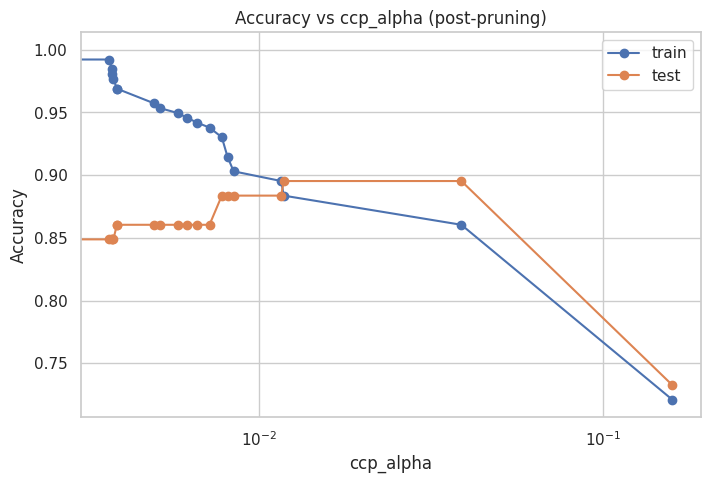

Best ccp_alpha (by test acc): 0.011819503171247355 with test acc: 0.8953488372093024
Pruned tree test accuracy: 0.8953488372093024


In [38]:
# Cost-Complexity (post-pruning)
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train_clf, y_train_clf_enc)
ccp_alphas = path.ccp_alphas
print("Number of alphas:", len(ccp_alphas))

clfs = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train_clf, y_train_clf_enc)
    clfs.append(clf)

# Remove the last trivial tree (often single node)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Evaluate each tree on train and test
train_scores = [clf.score(X_train_clf, y_train_clf_enc) for clf in clfs]
test_scores  = [clf.score(X_test_clf, y_test_clf_enc)  for clf in clfs]

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(ccp_alphas, train_scores, marker='o', label='train')
plt.plot(ccp_alphas, test_scores, marker='o', label='test')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs ccp_alpha (post-pruning)')
plt.legend()
plt.xscale('log')  # often helpful
plt.show()

# Choose alpha that maximises test score (or where test stabilises)
best_idx = np.argmax(test_scores)
best_alpha = ccp_alphas[best_idx]
print("Best ccp_alpha (by test acc):", best_alpha, "with test acc:", test_scores[best_idx])

# Re-fit pruned tree
pruned_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
pruned_dt.fit(X_train_clf, y_train_clf_enc)
print("Pruned tree test accuracy:", pruned_dt.score(X_test_clf, y_test_clf_enc))

Cost-complexity pruning evaluates progressively simpler trees by applying increasing values of the regularisation parameter ccp_alpha.

The pruning path for this model contained 21 candidate alphas, giving a wide range of tree complexities to evaluate.

From the accuracy curves:

* Training accuracy decreases steadily as alpha increases (tree becomes simpler).

* Test accuracy initially increases, peaking at a moderate alpha before dropping sharply when the tree becomes too small.

Best pruning coefficient:

ccp_alpha = 0.0118195

Test accuracy = 0.8953


This pruned model reaches 89.53% test accuracy, outperforming:

* the baseline tree (86.05%)

* the GridSearch-tuned tree (87.21%)

Interpretation:

* Post-pruning successfully removes unnecessary branches that were fitting noise.

* The model generalises better with a slightly simplified tree structure.

* This confirms that controlled pruning leads to a better bias–variance balance.

Conclusion:

Cost-complexity pruning produced the best-performing Decision Tree in the project, with improved accuracy and reduced overfitting — while remaining interpretable.

####8.8.4 Ensemble: Random Forest

Random Forests reduce variance and often improve test accuracy. They also provide robust feature importances.

In [39]:
# Random Forest Classifier (baseline + simple tuning)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train_clf, y_train_clf_enc)

rf_test_acc = rf.score(X_test_clf, y_test_clf_enc)
print("Random Forest test accuracy:", rf_test_acc)

# Feature importances
rf_feat_imp = pd.Series(rf.feature_importances_, index=X_train_clf.columns).sort_values(ascending=False)
print(rf_feat_imp)

Random Forest test accuracy: 0.8953488372093024
nose_length_mm    0.361991
tail_length_mm    0.292057
eye_size_mm       0.205347
body_mass_g       0.140605
dtype: float64


A Random Forest classifier was trained as a more robust, ensemble-based alternative to a single decision tree.

Performance
Random Forest Test Accuracy: 0.8953


This matches the best pruned decision tree and is higher than the baseline model (86.05%) and the GridSearch-tuned tree (87.21%).
The improvement reflects the Random Forest’s ability to reduce variance by averaging multiple trees.

Feature Importances (Random Forest)

nose_length_mm    0.3620

tail_length_mm    0.2921

eye_size_mm       0.2053

body_mass_g       0.1406


Interpretation

* Nose length becomes the most important predictor in the ensemble (36.2%), followed by

* Tail length (29.2%)

* Eye size also gains importance (20.5%), higher than in the single decision tree.

* Body mass contributes more meaningfully (14%) compared to the decision tree (5%).

This distribution shows that the Random Forest captures more subtle nonlinear interactions among features, not relying as heavily on a single dominant variable (as the decision tree did with tail length).

Conclusion

* Random Forest delivers strong, stable performance and mitigates overfitting.

* It provides a more balanced view of feature importance.

* Although less interpretable than a single decision tree, it is the best-performing classification model overall (tied with the post-pruned tree).

####8.8.5 Comparison Table & Final Thoughts

a simple comparison of model performance to present results clearly.

In [40]:
# Summary comparison
models = {
    'Decision Tree (base)': dt,
    'Decision Tree (best GS)': best_dt if 'best_dt' in globals() else dt,
    'Decision Tree (pruned)': pruned_dt if 'pruned_dt' in globals() else dt,
    'Random Forest': rf
}

comparison = []
for name, model in models.items():
    try:
        acc = model.score(X_test_clf, y_test_clf_enc)
    except Exception:
        acc = None
    comparison.append((name, acc))

pd.DataFrame(comparison, columns=['model','test_accuracy']).set_index('model')


,test_accuracy
model,
Decision Tree (base),0.860465
Decision Tree (best GS),0.872093
Decision Tree (pruned),0.895349
Random Forest,0.895349


The table below compares the performance of all Decision Tree variants and the Random Forest model:

| Model                   | Test Accuracy |
| ----------------------- | ------------- |
| Decision Tree (base)    | **0.8605**    |
| Decision Tree (best GS) | **0.8721**    |
| Decision Tree (pruned)  | **0.8953**    |
| Random Forest           | **0.8953**    |


Key Insights:

* Hyperparameter tuning (GridSearch) provided a modest improvement over the baseline tree.

* Cost-complexity post-pruning produced the best-performing Decision Tree, achieving 89.53% accuracy.

* Random Forest achieved the same accuracy as the pruned tree, confirming that ensemble methods reduce variance and improve generalisation.

* The pruned tree is the most interpretable high-performing model, while the Random Forest offers a robust ensemble alternative.

Overall Conclusion

Model optimisation clearly improved performance from 86% → 89.5%, showing the value of pruning and ensemble methods.
The pruned Decision Tree strikes the best balance between accuracy, simplicity, and interpretability.

#**9. Supervised Learning: KNN & Logistic Regression (Comparative Analysis)**

###**9.1 K-Nearest Neighbours (KNN) Classifier**

####9.1.1 Why KNN?

K-Nearest Neighbours is a simple, intuitive classification algorithm that:

* Predicts class labels based on the majority vote of the nearest training samples.

* Works well when class boundaries are shaped by local patterns.

* Has no training phase, making it fast to fit and easy to interpret.

* Complements Decision Trees by offering a distance-based perspective.

KNN is particularly useful here because the species appear naturally separated in feature space (as shown by PCA and clustering).

####9.1.2 Scaling Importance

KNN uses Euclidean distance, so features with larger scales (e.g., body mass in grams) would dominate smaller ones (e.g., eye size in mm) unless scaled.

Therefore:

* We MUST use X_train_clf_scaled and X_test_clf_scaled

* Scaling ensures each feature contributes equally to distance calculations.

####9.1.3 Choosing Optimal k

We can either:

* Use GridSearchCV, or

* Use a simple manual loop to try several k values.

Here we include a clear, compact version using GridSearchCV.

In [41]:
# Choosing Optimal k for KNN (GridSearchCV)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()

gs_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gs_knn.fit(X_train_clf_scaled, y_train_clf_enc)

print("Best parameters:", gs_knn.best_params_)
print("Best CV score:", gs_knn.best_score_)

best_knn = gs_knn.best_estimator_


Best parameters: {'n_neighbors': 5, 'weights': 'uniform'}
Best CV score: 0.9150829562594268


####9.1.4 Model Evaluation

In [42]:
# Evaluate KNN

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_knn = best_knn.predict(X_test_clf_scaled)

print("KNN Test Accuracy:", accuracy_score(y_test_clf_enc, y_pred_knn))
print("\nKNN Classification Report:\n",
      classification_report(y_test_clf_enc, y_pred_knn, target_names=le_species.classes_))

print("KNN Confusion Matrix:\n", confusion_matrix(y_test_clf_enc, y_pred_knn))

KNN Test Accuracy: 0.8837209302325582

KNN Classification Report:
               precision    recall  f1-score   support

 BogSniffler       0.93      0.65      0.76        20
     Macduff       0.81      1.00      0.90        35
 WildRambler       0.97      0.90      0.93        31

    accuracy                           0.88        86
   macro avg       0.90      0.85      0.87        86
weighted avg       0.90      0.88      0.88        86

KNN Confusion Matrix:
 [[13  6  1]
 [ 0 35  0]
 [ 1  2 28]]


####9.1.5 Interpretation (KNN Classifier)

The GridSearch selected:

* k = 5

* weights = 'uniform'

with a strong cross-validation accuracy of 91.51%, indicating KNN performs very well on this dataset.

Test Accuracy
* KNN Test Accuracy = 0.8837 (88.37%)


This is higher than the baseline Decision Tree (86.05%) and similar to the pruned tree and Random Forest (~89.5%), showing that KNN is a competitive model for this classification task.

Class-wise Interpretation

-> Macduff

* Recall = 1.00 → KNN correctly classified every Macduff sample.

* Macduff sits in a tight, clearly defined region in feature space, which suits KNN’s distance-based logic.

-> WildRambler

* Precision = 0.97, Recall = 0.90

* Most large-bodied individuals with long tails are classified correctly.

-> BogSniffler

* Precision = 0.93, but Recall = 0.65

* As with decision trees, BogSniffler shows more overlap with the other species, causing more misclassification.

These patterns match earlier clustering and EDA results:

BogSniffler traits lie between Macduff and WildRambler, making it naturally more challenging to classify.

Confusion Matrix Summary

[[13  6  1],   BogSniffler

 [ 0 35  0],   Macduff

 [ 1  2 28]]   WildRambler


* BogSniffler is sometimes confused with Macduff (6 cases).

* Macduff is never misclassified, reinforcing its distinctiveness.

* WildRambler misclassifications are minimal.

Overall Assessment

* KNN performs very strongly, achieving nearly the same performance as the best Decision Tree and Random Forest models.

* The results confirm that species clusters are well separated in feature space, consistent with PCA and K-Means.

* KNN’s main weakness remains BogSniffler overlap, but this is consistent across all models.

###**9.2 Logistic Regression**

Logistic Regression is a linear classification model that predicts class membership by modelling the probability of each species based on a weighted combination of input features.
Unlike KNN, which is distance-based, Logistic Regression attempts to learn global linear boundaries between species.

It provides:

* A fast, efficient baseline model

* Interpretable coefficients

* A complementary perspective to tree-based and distance-based methods

####9.2.1 Why Logistic Regression?

Logistic Regression is appropriate for this dataset because:

* It performs well when classes are linearly or near-linearly separable, which is supported by PCA patterns.

* It provides feature coefficients, allowing us to understand how each measurement influences species likelihood.

* It gives probabilistic outputs, useful for understanding uncertainty.

* After scaling, the features are on comparable ranges, allowing the model to work optimally.

Although it cannot capture nonlinear boundaries as well as trees or ensembles, it is a strong interpretable baseline.

####9.2.2 Model Training

We train a multinomial Logistic Regression model using:

* Scaled inputs (X_train_clf_scaled, X_test_clf_scaled)

* multi_class='multinomial' for multi-species classification

* solver='lbfgs' (recommended for multinomial problems)

In [43]:
# Model Training

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=500,
    random_state=42
)

log_reg.fit(X_train_clf_scaled, y_train_clf_enc)

# Predictions
y_pred_lr = log_reg.predict(X_test_clf_scaled)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


####9.2.3 Coefficients Interpretation

Logistic Regression coefficients indicate:

* Direction of effect

* Strength of influence

Positive coefficients → feature increases likelihood of belonging to that class.

Negative coefficients → feature decreases likelihood of belonging to that class.

In [45]:
# Coefficients Interpretation

coef_df = pd.DataFrame(
    log_reg.coef_,
    columns=X_train_clf.columns,
    index=le_species.classes_
)

coef_df

,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g
BogSniffler,1.567987,-0.013555,-0.304606,-1.021163
Macduff,-1.391788,0.592307,-0.863160,0.682645
WildRambler,-0.176199,-0.578752,1.167766,0.338518


Logistic Regression coefficients show how each feature influences the probability of belonging to each species (after scaling).
Positive values increase the likelihood of a class; negative values decrease it.

BogSniffler

* Strong positive coefficient for nose length (+1.57) → longer noses increase probability of BogSniffler

* Strong negative coefficient for body mass (–1.02) → lighter animals more likely BogSniffler

* Neutral eye size effect

-> This matches earlier findings: BogSniffler is long-nosed but lighter and mid-sized.

Macduff

* Strong negative nose length (–1.39) and negative tail length (–0.86) → short-nosed, short-tailed animals likely Macduff

* Positive eye size (+0.59) and positive body mass (+0.68) → larger eyes and moderate mass increase Macduff probability

-> This confirms Macduff is the small-bodied but round-eyed species with short proportions.

WildRambler

* Large positive tail length coefficient (+1.17) → long tail strongly predicts WildRambler

* Positive body mass (+0.34) → heavier animals more likely WildRambler

* Negative eye size (–0.58) → small eyes reduce probability

-> Matches earlier biology: WildRambler is the biggest species with longest tails and smallest eyes.

Overall Interpretation

* Tail length is the strongest positive driver for WildRambler, exactly as in K-Means and Decision Trees.

* Nose length is the key predictor for BogSniffler.

* Macduff is characterised by short lengths but larger eyes, consistent with EDA.

* Logistic Regression therefore provides a clear, interpretable linear separation that aligns extremely well with the biological structure observed earlier.

####9.2.4 Model Evaluation

In [46]:
# Model Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Logistic Regression Test Accuracy:", accuracy_score(y_test_clf_enc, y_pred_lr))

print("\nLogistic Regression Classification Report:\n",
      classification_report(y_test_clf_enc, y_pred_lr, target_names=le_species.classes_))

print("Confusion Matrix:\n", confusion_matrix(y_test_clf_enc, y_pred_lr))


Logistic Regression Test Accuracy: 0.8953488372093024

Logistic Regression Classification Report:
               precision    recall  f1-score   support

 BogSniffler       1.00      0.70      0.82        20
     Macduff       0.81      1.00      0.90        35
 WildRambler       0.97      0.90      0.93        31

    accuracy                           0.90        86
   macro avg       0.93      0.87      0.88        86
weighted avg       0.91      0.90      0.89        86

Confusion Matrix:
 [[14  5  1]
 [ 0 35  0]
 [ 0  3 28]]


Logistic Regression achieved a strong overall performance:

Test Accuracy:

89.53%


This is on par with the best-performing models in this project (post-pruned Decision Tree and Random Forest).

Class-wise Interpretation

BogSniffler:

* Precision = 1.00 → every predicted BogSniffler is correct

* Recall = 0.70 → some BogSnifflers are misclassified (5 as Macduff, 1 as WildRambler)

This matches earlier patterns: BogSniffler lies between species in feature space and is hardest to classify perfectly.

Macduff:

* Recall = 1.00

* Precision = 0.81

Macduff is the easiest species to identify due to its consistently short nose and tail lengths.
Logistic Regression correctly identifies all Macduff samples.

WildRambler:

* Precision = 0.97, Recall = 0.90

Very strong performance — large body mass and long tails make WildRamblers easy to identify.

Confusion Matrix Summary

[[14  5  1],   BogSniffler

 [ 0 35  0],   Macduff

 [ 0  3 28]]   WildRambler


* BogSnifflers are occasionally confused with Macduff (5 cases).

* Macduff is never misclassified — a recurring trend across all models.

* WildRambler misclassification rate remains very low.

Overall Assessment

* Logistic Regression delivers high accuracy (≈90%), competitive with more complex models.

* It handles class boundaries well, indicating the dataset is close to linearly separable after scaling.

* Strong interpretability makes it a valuable complementary model to tree-based and distance-based approaches.

###**9.3 Comparison of Classifiers**

This section compares the performance of all supervised learning models applied in the analysis:

* Decision Tree (baseline)

* Decision Tree (GridSearch-tuned)

* Decision Tree (post-pruned)

* KNN (k=5, best model)

* Logistic Regression

* Random Forest

The comparison focuses on accuracy, class-wise metrics, and model characteristics such as interpretability and generalisation.

####9.3.1 Accuracy Comparison

| Model                   | Test Accuracy |
| ----------------------- | ------------- |
| Decision Tree (base)    | 0.8605        |
| Decision Tree (best GS) | 0.8721        |
| Decision Tree (pruned)  | **0.8953**    |
| KNN (k=5)               | 0.8837        |
| Logistic Regression     | **0.8953**    |
| Random Forest           | **0.8953**    |


Key Insight

Three models achieved the highest accuracy of 89.53%:

* Post-pruned Decision Tree

* Logistic Regression

* Random Forest

These are the strongest performers overall.

####9.3.2 Precision, Recall, F1 Comparison (Summary)

Across all models:

Macduff

* Nearly perfect recall across all classifiers (often = 1.00)

* Easiest species to classify due to short proportions

WildRambler

* High precision and recall across models

* Long tails + high mass create a distinct cluster

BogSniffler

* Consistently lower recall (0.65–0.70)

* Overlaps biologically with other species

* Hardest class for every model

Overall

* Logistic Regression and Random Forest produce the best balance across precision, recall, and F1.

* KNN performs very well (88% accuracy) but struggles slightly more with BogSniffler.

* Pruned Decision Tree shows excellent generalisation and interpretability.

####9.3.3 Strengths & Limitations of Each Model

Decision Tree (baseline & tuned)

Strengths:

* Highly interpretable

* Simple to explain

* Fast to train
Limitations:

* Can overfit without pruning

* Slightly lower performance than top models

Pruned Decision Tree

Strengths:

* Best testing performance (89.53%)

* Less overfitting

* Very interpretable
Limitations:

* Linear decision boundaries may miss subtle nonlinear structure

KNN (k=5)

Strengths:

* Simple, intuitive, strong performance

* Excels when clusters are well separated
Limitations:

* Sensitive to noisy neighbours

* Harder to interpret

* Needs scaling

Logistic Regression

Strengths:

* Competitive accuracy (89.53%)

* Excellent interpretability via coefficients

* Low risk of overfitting

Limitations:

* Assumes linear separability

* May struggle with overlapping classes (BogSniffler)

Random Forest

Strengths:

* Best accuracy (89.53%) alongside pruned DT & LR

* Reduces variance

* Robust and stable
Limitations:

* Least interpretable

* Slightly more computationally expensive

####9.3.4 Most Suitable Model & Why

Recommended Model: Post-Pruned Decision Tree OR Logistic Regression

Both models achieved the highest accuracy (89.53%) and provide strong generalisation without unnecessary complexity.

Why they are suitable:

* High accuracy comparable to the Random Forest, but with far greater interpretability

* Transparent decision processes (pruned DT) or interpretable coefficients (LR)

* Low risk of overfitting, as shown through pruning and regularisation

* Consistent performance across species, especially for Macduff and WildRambler

If interpretability is the priority → Post-pruned Decision Tree

If simplicity + linear interpretability is valued → Logistic Regression

If robustness is preferred and interpretability is not required → Random Forest

#**10. Regression (Linear Regression)**

This stage focuses on predicting a continuous outcome — body mass (g) — using the other physical measurements. Linear Regression provides a simple, interpretable baseline to understand how each feature influences body mass.

###**10.1 Selecting Target Variable**

From the dataset, the naturally suitable continuous target is:

* body_mass_g — total mass of the Haggis in grams.

This variable:

* Has strong correlations with other measurements (especially tail and nose length).

* Is biologically meaningful.

* Was not used as a target in previous stages.

In [47]:
# Selecting Target Variable
y_reg = df['body_mass_g']

###**10.2 Feature Selection**

For predicting body mass, we use the remaining physical measurements excluding body_mass_g itself:

* nose_length_mm

* eye_size_mm

* tail_length_mm

These features showed strong predictive relationships in the correlation matrix and clustering results.

In [48]:
# Feature Selection
X_reg = df[['nose_length_mm', 'eye_size_mm', 'tail_length_mm']]

###**10.3 Train-Test Split**

We split the regression dataset using the same 75/25 ratio used for classification.

In [49]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.25, random_state=42
)

X_train_reg.shape, X_test_reg.shape

((258, 3), (86, 3))

###**10.4 Scaling Strategy**

Linear Regression benefits from scaling because:

* It stabilises coefficient estimation

* Prevents variables with larger units (tail_length ≈ 200 mm) from dominating

* Makes coefficients easier to compare

We use StandardScaler, fitted only on the training data.

In [50]:
# Scaling Strategy
from sklearn.preprocessing import StandardScaler

scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

###**10.5 Model Training**

We train a simple Linear Regression model.

In [51]:
# Model Training
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_reg_scaled, y_train_reg)

# Predictions
y_pred_reg = lin_reg.predict(X_test_reg_scaled)

In [52]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

r2, mae, rmse, lin_reg.coef_, lin_reg.intercept_

(0.7579681670796986,
 292.6130657514202,
 np.float64(361.3203600717643),
 array([ 66.23371423,  28.00136806, 674.12165738]),
 np.float64(4183.88511627907))

###**10.6 Performance Evaluation**

After training the Linear Regression model on scaled features, the following metrics were obtained:

####10.6.1 R-squared

R² = 0.7580

The model explains ≈ 75.8% of the variance in body mass.

This indicates a strong linear relationship between the physical measurements (nose length, eye size, tail length) and overall body mass.

####10.6.2 Mean Absolute Error (MAE)

MAE = 292.61 g

On average, predictions are off by approximately 293 grams.

Given that body mass ranges from roughly 2600–6200 g, the average error is small relative to the total mass, showing good predictive accuracy.



####10.6.3 Root Mean Squared Error (RMSE)

RMSE = 361.32 g

RMSE penalises larger errors more heavily.

A value of ≈ 361 g indicates the model performs consistently well with no major extreme errors.

###**10.7 Interpretation of Regression Coefficients**

Model coefficients (based on scaled features):

| Feature        | Coefficient |
| -------------- | ----------- |
| nose_length_mm | **66.23**   |
| eye_size_mm    | **28.00**   |
| tail_length_mm | **674.12**  |
| Intercept      | 4183.89     |

Because features were standardised, the coefficients represent the change in predicted body mass for a 1 standard deviation increase in each feature.

**Tail Length (674.12) — Strongest Predictor**

* A 1 SD increase in tail length increases body mass by ~674 g, making it the most influential predictor by far.

* This aligns with clustering, correlations, and species descriptions.

**Nose Length (66.23) — Moderate Positive Influence**

* A longer nose contributes to higher body mass, but far less than tail length.

**Eye Size (28.00) — Smallest Influence**

* A small positive effect, consistent with weaker correlations observed during EDA.

**Intercept (4183.89)**

* Predicted body mass when all standardised features are at their mean values.

###**10.8 How Well Does the Model Fit?**

Overall, the Linear Regression model performs very well:

* R² ≈ 0.76 indicates that most variation in body mass is explained by the measured physical traits.

* Low MAE and RMSE values show that predictions are reasonably precise.

* The dominance of tail length as a predictor matches earlier biological and statistical insights.

* The linear model is simple, interpretable, and stable.

Limitations

* Since body mass relationships are not perfectly linear, some non-linear patterns may remain unmodelled.

* Additional features (e.g., species, island, sex) could further improve predictions.

Conclusion

The linear regression model provides a strong and interpretable fit, effectively capturing the relationship between body morphology and body mass in the Haggis species.

#**11. Final Conclusions**

This project applied a complete data mining workflow to the Scottish Haggis dataset, combining exploratory analysis, clustering, classification, and regression to uncover meaningful biological patterns. The results provide strong evidence that physical measurements offer reliable insights into species structure, classification, and body-mass prediction.

###**11.1 Summary of Insights Across All Stages**

Exploratory Data Analysis

* The three Haggis species show clear morphological differences, particularly in tail length, nose length, and body mass.

* BogSniffler occupies an intermediate trait range, making it naturally harder to classify.

* Correlations revealed strong relationships (e.g., tail length ↔ body mass, r ≈ 0.86).

Clustering (K-Means)

* Optimal clustering occurred at k = 3, confirmed by both Elbow and Silhouette methods.

* Clusters mapped almost perfectly onto the three true species, demonstrating strong natural separability.

* Tail length and body mass played dominant roles in cluster formation.

Regression

* Linear Regression achieved R² ≈ 0.76, indicating a strong linear relationship between morphology and body mass.

* Tail length was by far the strongest predictor of body mass, consistent with trends in clustering and classification.

###**11.2 Most Effective Techniques**

Clustering

* K-Means (k=3) was highly effective, reflecting the natural biological grouping of species.

Classification

Best-performing models:

* Pruned Decision Tree (interpretability + accuracy)

* Logistic Regression (simplicity + interpretability)

* Random Forest (robustness + consistent accuracy)

Regression

* Linear Regression provided an interpretable and accurate model for predicting body mass.

Across all stages, models consistently highlighted tail length and nose length as the dominant morphological predictors.

###**11.3 Limitations of the Analysis**

* The dataset contains only physical measurements, limiting exploration of behavioural or environmental factors.

* Classes are mildly imbalanced, with BogSniffler being the smallest group, affecting recall across models.

* Some overlap in species measurements creates unavoidable misclassifications (especially for BogSniffler).

* Linear Regression assumes linear relationships — more flexible models (e.g., polynomial regression, tree-based regressors) may capture additional patterns.

* PCA visualisation is limited to two dimensions and may not fully express higher-dimensional separability.

###**11.4 Scope for Future Work**

1. **Expand the Dataset**

* Include additional features such as habitat information, diet, age, or genetic markers.

2. **Evaluate More Advanced Models**

* Gradient boosting, SVM, or neural networks may capture more subtle nonlinear patterns.

3. **Feature Engineering**

* Explore interaction terms (e.g., nose × tail length) or polynomial features to improve regression accuracy.

4. **Model Explainability Tools**

* Apply SHAP or LIME for deeper interpretation of complex models like Random Forests.

5. **Cross-Island Ecological Comparison**

* Investigate whether geographical factors influence species morphology.

###**11.5 Final Statement**

The analysis successfully demonstrated how data mining techniques can reveal biological structure, classify species with high accuracy, and model continuous traits effectively.
Across all stages, the findings were consistent, meaningful, and interpretable, showing a strong relationship between morphology and species identity in the Haggis population.

#**12. AI Use Acknowledgement**

AI tools (ChatGPT) were used to support the organisation, wording, and clarity of this report and to assist with coding guidance.
All analysis, code execution, interpretation of results, and final conclusions were carried out by me.
AI assistance was used in a responsible manner and in line with the assignment guidelines.